In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA, ARIMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.arima_model          import  ARMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('train-2.csv')
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [3]:
df.tail()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [4]:
df.shape

(1017209, 9)

In [5]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [6]:
df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [7]:
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [9]:
## df=df.sort_index()

In [10]:
# df.head()

In [11]:
# df.set_index('Date', inplace=True)

In [12]:
#df.head()

In [13]:
atr=df[df['Store']==1097]

In [14]:
atr

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1096      1097          5 2015-07-31  11443       2451     1      1   
2211      1097          4 2015-07-30  10324       2346     1      1   
3326      1097          3 2015-07-29  10053       2296     1      1   
4441      1097          2 2015-07-28  10225       2334     1      1   
5556      1097          1 2015-07-27  10874       2357     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1012731   1097          6 2013-01-05   5460       1390     1      0   
1013846   1097          5 2013-01-04   6430       1799     1      0   
1014961   1097          4 2013-01-03   7053       1803     1      0   
1016076   1097          3 2013-01-02   6688       1819     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday  
1096               0              1  
2211               0              1  
3326               0              1  
4441               0              1  
5556               0              1  
...              ...            ...  
1012731            0              0  
1013846            0              1  
1014961            0              1  
1016076            0              1  
1017190            a              1  

[942 rows x 9 columns]

In [15]:
atr.Sales.value_counts()

11030    3
10690    3
9861     3
10428    3
11166    3
        ..
11358    1
6869     1
8827     1
8156     1
5961     1
Name: Sales, Length: 870, dtype: int64

In [16]:
atr

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1096      1097          5 2015-07-31  11443       2451     1      1   
2211      1097          4 2015-07-30  10324       2346     1      1   
3326      1097          3 2015-07-29  10053       2296     1      1   
4441      1097          2 2015-07-28  10225       2334     1      1   
5556      1097          1 2015-07-27  10874       2357     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1012731   1097          6 2013-01-05   5460       1390     1      0   
1013846   1097          5 2013-01-04   6430       1799     1      0   
1014961   1097          4 2013-01-03   7053       1803     1      0   
1016076   1097          3 2013-01-02   6688       1819     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday  
1096               0              1  
2211               0              1  
3326               0              1  
4441               0              1  
5556               0              1  
...              ...            ...  
1012731            0              0  
1013846            0              1  
1014961            0              1  
1016076            0              1  
1017190            a              1  

[942 rows x 9 columns]

In [17]:
atr=atr.sort_index()

In [18]:
atr

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1096      1097          5 2015-07-31  11443       2451     1      1   
2211      1097          4 2015-07-30  10324       2346     1      1   
3326      1097          3 2015-07-29  10053       2296     1      1   
4441      1097          2 2015-07-28  10225       2334     1      1   
5556      1097          1 2015-07-27  10874       2357     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1012731   1097          6 2013-01-05   5460       1390     1      0   
1013846   1097          5 2013-01-04   6430       1799     1      0   
1014961   1097          4 2013-01-03   7053       1803     1      0   
1016076   1097          3 2013-01-02   6688       1819     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday  
1096               0              1  
2211               0              1  
3326               0              1  
4441               0              1  
5556               0              1  
...              ...            ...  
1012731            0              0  
1013846            0              1  
1014961            0              1  
1016076            0              1  
1017190            a              1  

[942 rows x 9 columns]

In [19]:
atr=atr.set_index('Date')

In [20]:
atr.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31   1097          5  11443       2451     1      1            0   
2015-07-30   1097          4  10324       2346     1      1            0   
2015-07-29   1097          3  10053       2296     1      1            0   
2015-07-28   1097          2  10225       2334     1      1            0   
2015-07-27   1097          1  10874       2357     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-30              1  
2015-07-29              1  
2015-07-28              1  
2015-07-27              1

In [21]:
atr.tail()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2013-01-05   1097          6   5460       1390     1      0            0   
2013-01-04   1097          5   6430       1799     1      0            0   
2013-01-03   1097          4   7053       1803     1      0            0   
2013-01-02   1097          3   6688       1819     1      0            0   
2013-01-01   1097          2   5961       1405     1      0            a   

            SchoolHoliday  
Date                       
2013-01-05              0  
2013-01-04              1  
2013-01-03              1  
2013-01-02              1  
2013-01-01              1

In [22]:
data=atr.copy()

In [23]:
data1=atr.copy()

In [24]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31   1097          5  11443       2451     1      1            0   
2015-07-30   1097          4  10324       2346     1      1            0   
2015-07-29   1097          3  10053       2296     1      1            0   
2015-07-28   1097          2  10225       2334     1      1            0   
2015-07-27   1097          1  10874       2357     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-30              1  
2015-07-29              1  
2015-07-28              1  
2015-07-27              1

In [25]:
data.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31   1097          5  11443       2451     1      1            0   
2015-07-30   1097          4  10324       2346     1      1            0   
2015-07-29   1097          3  10053       2296     1      1            0   
2015-07-28   1097          2  10225       2334     1      1            0   
2015-07-27   1097          1  10874       2357     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-30              1  
2015-07-29              1  
2015-07-28              1  
2015-07-27              1

Text(0, 0.5, 'Daily Sales of store 682')

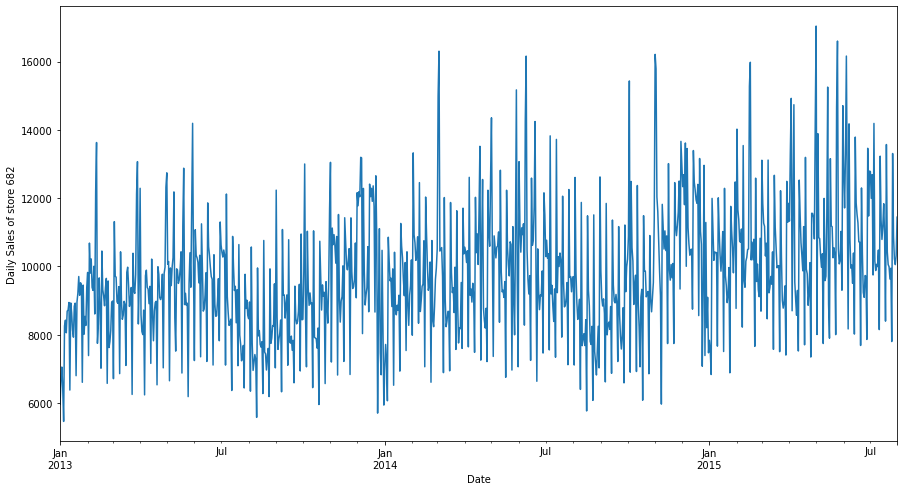

In [26]:
plt.figure(figsize=(15,8))
data['Sales'].plot()
plt.ylabel('Daily Sales of store 682')

In [27]:
data.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [28]:
data=data.drop(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'], axis=1)

In [29]:
data

Sales
Date             
2015-07-31  11443
2015-07-30  10324
2015-07-29  10053
2015-07-28  10225
2015-07-27  10874
...           ...
2013-01-05   5460
2013-01-04   6430
2013-01-03   7053
2013-01-02   6688
2013-01-01   5961

[942 rows x 1 columns]

In [30]:
atr.isnull().sum()

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [31]:
atr.Sales.describe()

count      942.000000
mean      9744.599788
std       1900.891959
min       5460.000000
25%       8486.250000
50%       9603.000000
75%      10768.750000
max      17039.000000
Name: Sales, dtype: float64

In [32]:
data2=data['Sales']
data2.head()

Date
2015-07-31    11443
2015-07-30    10324
2015-07-29    10053
2015-07-28    10225
2015-07-27    10874
Name: Sales, dtype: int64

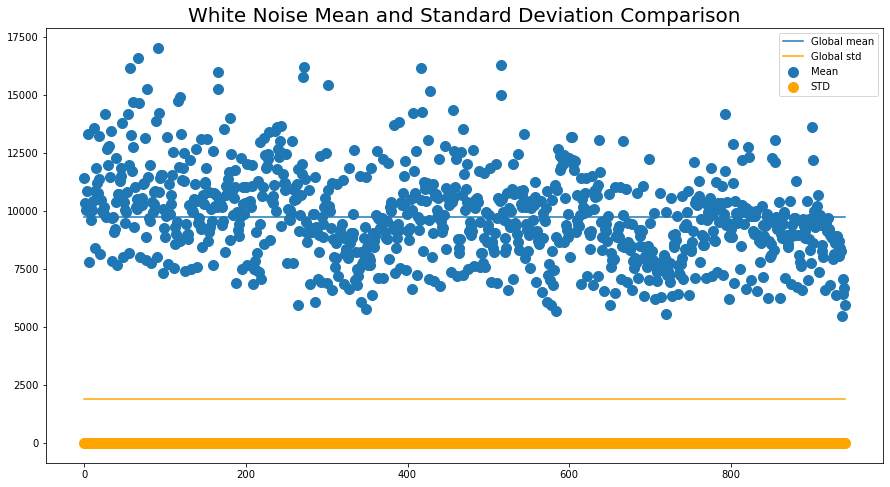

In [33]:
# Split into an arbitraty number of chunks
white_noise_chunks = data2
means, stds = [], []

# Get the mean and std values for every chunk
for chunk in white_noise_chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))
    
    
# Plot
plt.figure(figsize=(15,8))
plt.title('White Noise Mean and Standard Deviation Comparison', size=20)
plt.plot(np.arange(len(means)), [data2.mean()] * len(means), label='Global mean', lw=1.5)
plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100)
plt.plot(np.arange(len(stds)), [data2.std()] * len(stds), label='Global std', lw=1.5, color='orange')
plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', color='orange', s=100)
plt.legend();

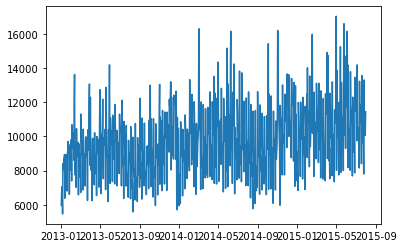

In [34]:
plt.plot(data2)

***Resampling data on weekly basis***

In [35]:
data2.resample('W').sum()

Date
2013-01-06    39850
2013-01-13    58147
2013-01-20    58224
2013-01-27    63107
2013-02-03    62110
              ...  
2015-07-05    85665
2015-07-12    71949
2015-07-19    78023
2015-07-26    71157
2015-08-02    52919
Freq: W-SUN, Name: Sales, Length: 135, dtype: int64

<AxesSubplot:xlabel='Date'>

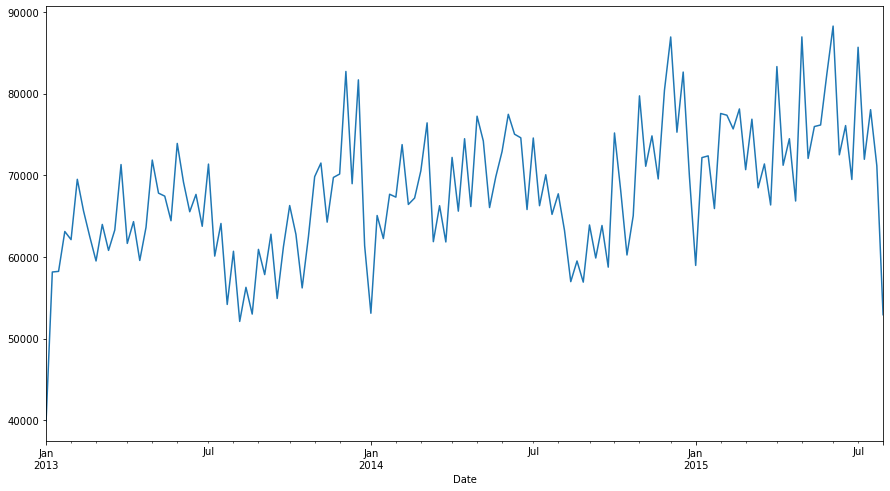

In [36]:
plt.figure(figsize=(15,8))
data2.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

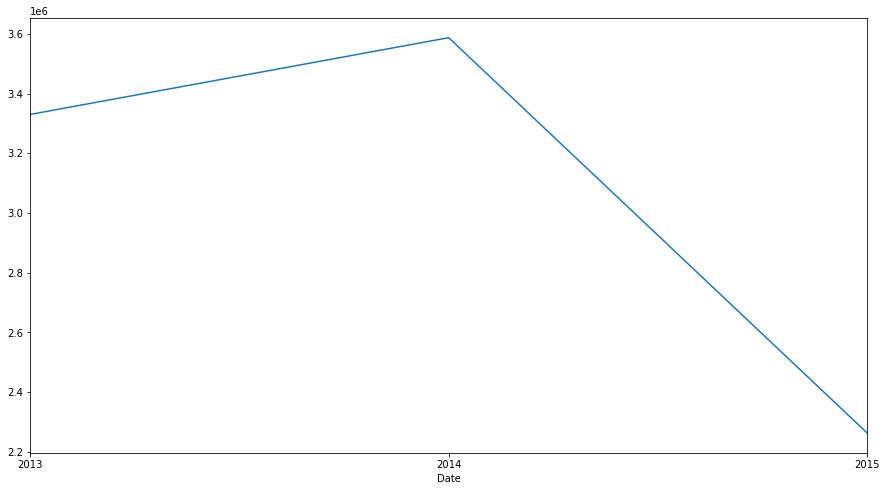

In [37]:
plt.figure(figsize=(15,8))
data2.resample('Y').sum().plot()  

<AxesSubplot:xlabel='Date'>

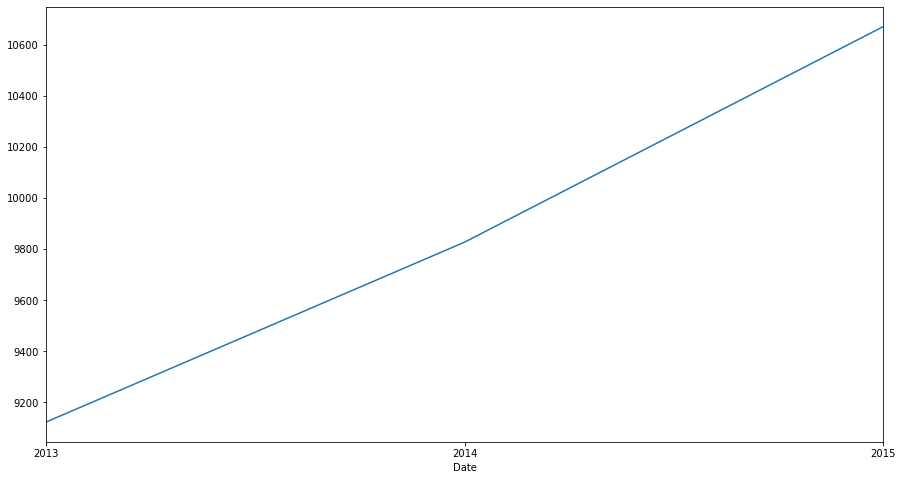

In [38]:
plt.figure(figsize=(15,8))
data2.resample('Y').mean().plot()

In [39]:
data2.index

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
               '2015-07-23', '2015-07-22',
               ...
               '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
               '2013-01-06', '2013-01-05', '2013-01-04', '2013-01-03',
               '2013-01-02', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)

In [40]:
data2.index.dayofweek

Int64Index([4, 3, 2, 1, 0, 6, 5, 4, 3, 2,
            ...
            3, 2, 1, 0, 6, 5, 4, 3, 2, 1],
           dtype='int64', name='Date', length=942)

In [41]:
data1.groupby(data2.index.dayofweek)['Sales'].mean()

Date
0    10175.664179
1     9490.014815
2     9491.918519
3     9829.859259
4    10021.822222
5     7417.164179
6    11786.835821
Name: Sales, dtype: float64

In [42]:
weekday=data1.groupby(data2.index.dayofweek)['Sales'].mean()
weekday

Date
0    10175.664179
1     9490.014815
2     9491.918519
3     9829.859259
4    10021.822222
5     7417.164179
6    11786.835821
Name: Sales, dtype: float64

In [43]:
weekday.index=['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

In [44]:
weekday

Mon     10175.664179
Tue      9490.014815
Wed      9491.918519
Thur     9829.859259
Fri     10021.822222
Sat      7417.164179
Sun     11786.835821
Name: Sales, dtype: float64

<AxesSubplot:>

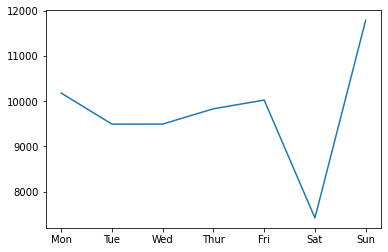

In [45]:
weekday.plot()

In [46]:
data2.index.dayofyear   

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
             10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
           dtype='int64', name='Date', length=942)

In [47]:
days=data2.index.dayofyear 
days

Int64Index([212, 211, 210, 209, 208, 207, 206, 205, 204, 203,
            ...
             10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
           dtype='int64', name='Date', length=942)

In [48]:
data1.groupby(days)['Sales'].mean()

Date
1      6937.666667
2      7307.666667
3      7037.333333
4      8162.333333
5      9128.000000
          ...     
361    7434.500000
362    9057.000000
363    9338.000000
364    8689.000000
365    6704.500000
Name: Sales, Length: 365, dtype: float64

Text(0, 0.5, 'Avg sales')

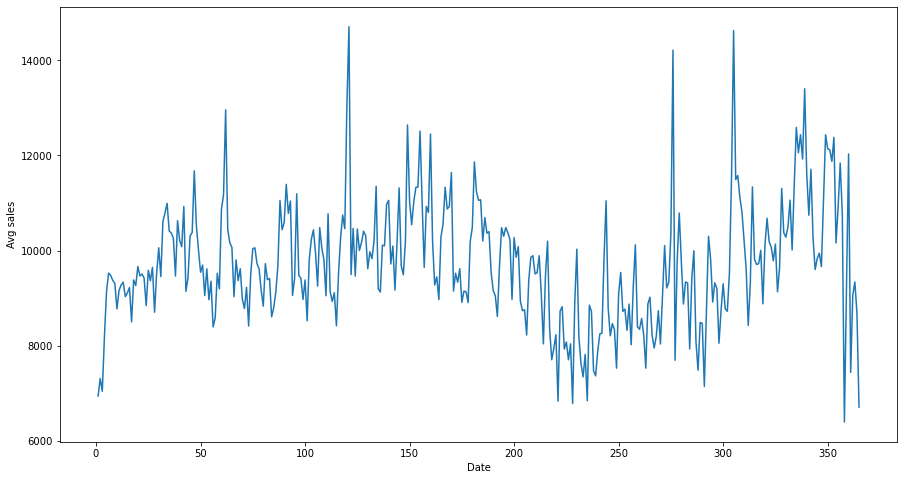

In [49]:
plt.figure(figsize=(15,8))
data1.groupby(days)['Sales'].mean().plot()
plt.ylabel('Avg sales')

In [50]:
data2.index.quarter

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Date', length=942)

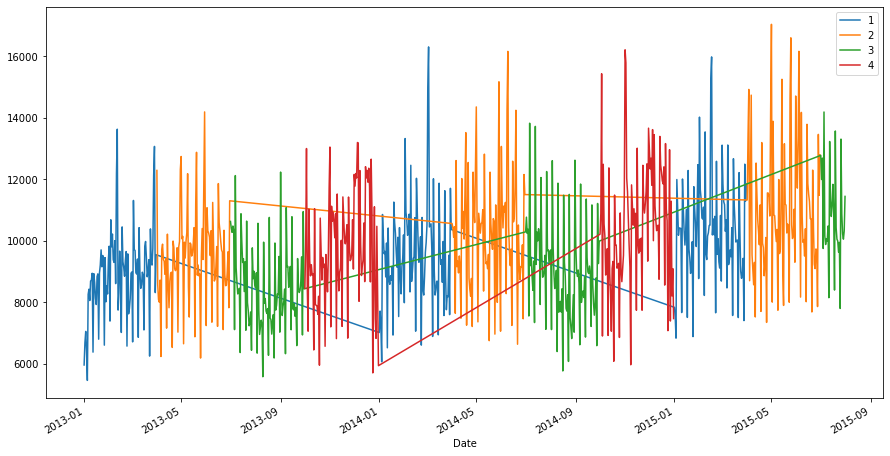

In [51]:
plt.figure(figsize=(15,8))
data.groupby(data2.index.quarter)['Sales'].plot()
plt.legend()

In [52]:
#  trend of Sales on weekdays vs weekends 

In [53]:
data1['dayofweek']=data1.index.dayofweek

In [54]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31   1097          5  11443       2451     1      1            0   
2015-07-30   1097          4  10324       2346     1      1            0   
2015-07-29   1097          3  10053       2296     1      1            0   
2015-07-28   1097          2  10225       2334     1      1            0   
2015-07-27   1097          1  10874       2357     1      1            0   

            SchoolHoliday  dayofweek  
Date                                  
2015-07-31              1          4  
2015-07-30              1          3  
2015-07-29              1          2  
2015-07-28              1          1  
2015-07-27              1          0

In [55]:
def assign_label(features):
    if features<5:
        return 'weekday'
    else:
        return 'weekend'

In [56]:
data1['dayofweek']=data1['dayofweek'].apply(assign_label)

In [57]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31   1097          5  11443       2451     1      1            0   
2015-07-30   1097          4  10324       2346     1      1            0   
2015-07-29   1097          3  10053       2296     1      1            0   
2015-07-28   1097          2  10225       2334     1      1            0   
2015-07-27   1097          1  10874       2357     1      1            0   

            SchoolHoliday dayofweek  
Date                                 
2015-07-31              1   weekday  
2015-07-30              1   weekday  
2015-07-29              1   weekday  
2015-07-28              1   weekday  
2015-07-27              1   weekday

<AxesSubplot:title={'center':'Weekend Sales'}, xlabel='Date'>

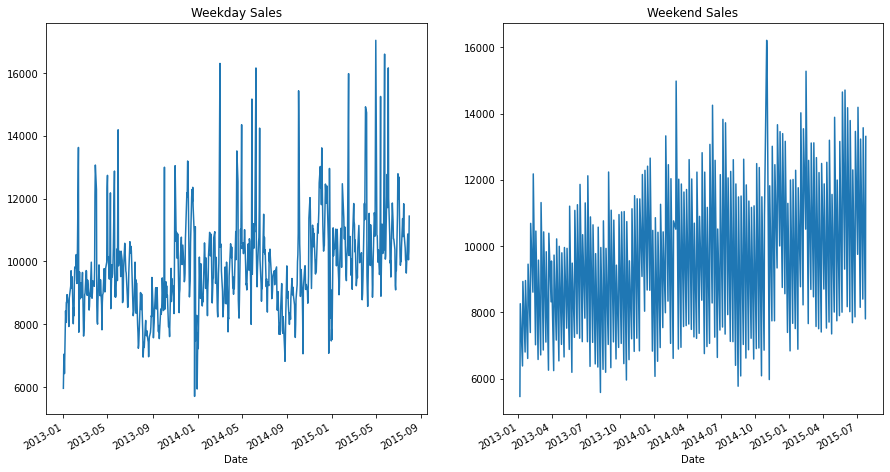

In [58]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
data1[data1['dayofweek']=='weekday']['Sales'].plot(ax=ax[0], title='Weekday Sales')
data1[data1['dayofweek']=='weekend']['Sales'].plot(ax=ax[1], title='Weekend Sales')

***naive model***

In [59]:
data1['Sales'].shift(1)

Date
2015-07-31        NaN
2015-07-30    11443.0
2015-07-29    10324.0
2015-07-28    10053.0
2015-07-27    10225.0
               ...   
2013-01-05     8258.0
2013-01-04     5460.0
2013-01-03     6430.0
2013-01-02     7053.0
2013-01-01     6688.0
Name: Sales, Length: 942, dtype: float64

In [60]:
data1['prediction_naive']=data1['Sales'].shift(1)

In [61]:
data1.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31   1097          5  11443       2451     1      1            0   
2015-07-30   1097          4  10324       2346     1      1            0   
2015-07-29   1097          3  10053       2296     1      1            0   
2015-07-28   1097          2  10225       2334     1      1            0   
2015-07-27   1097          1  10874       2357     1      1            0   

            SchoolHoliday dayofweek  prediction_naive  
Date                                                   
2015-07-31              1   weekday               NaN  
2015-07-30              1   weekday           11443.0  
2015-07-29              1   weekday           10324.0  
2015-07-28              1   weekday           10053.0  
2015-07-27              1   weekday           10225.0

<AxesSubplot:xlabel='Date'>

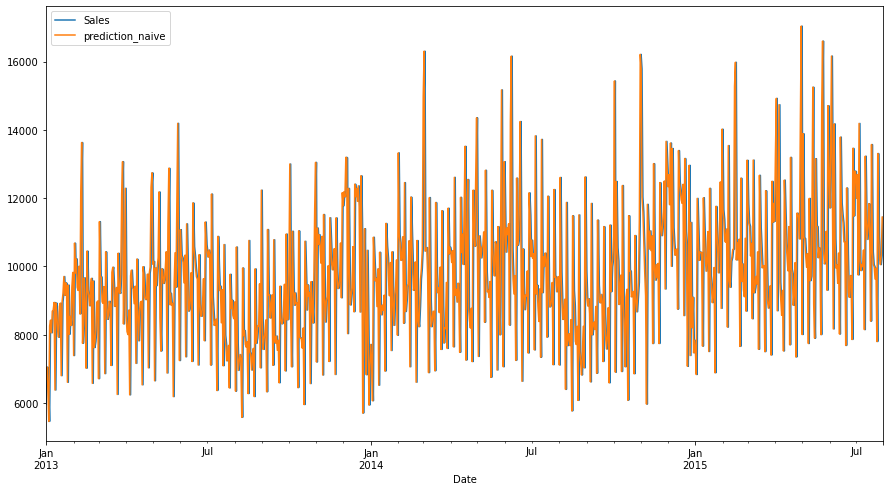

In [62]:
data1[['Sales','prediction_naive']].plot(figsize=(15,8))

In [63]:
# No much change , predicted vs actual are overlapping

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
rmse=np.sqrt(mean_squared_error(data1['Sales'][1:], data1['prediction_naive'][1:]))
rmse

2384.9056360089753

<AxesSubplot:xlabel='Date'>

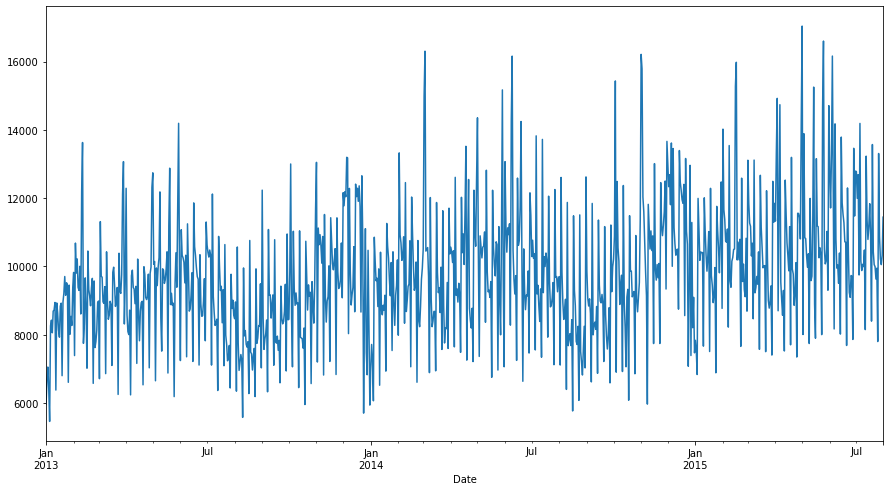

In [66]:
plt.figure(figsize=(15,8))
data1['Sales'].plot()

In [67]:
mean=data1['Sales'].rolling(window=7).mean()
std=data1['Sales'].rolling(window=7).std()

In [68]:
mean

Date
2015-07-31            NaN
2015-07-30            NaN
2015-07-29            NaN
2015-07-28            NaN
2015-07-27            NaN
                 ...     
2013-01-05    8079.428571
2013-01-04    7720.285714
2013-01-03    7482.142857
2013-01-02    7196.000000
2013-01-01    6896.571429
Name: Sales, Length: 942, dtype: float64

In [69]:
std

Date
2015-07-31            NaN
2015-07-30            NaN
2015-07-29            NaN
2015-07-28            NaN
2015-07-27            NaN
                 ...     
2013-01-05    1193.436475
2013-01-04    1265.964022
2013-01-03    1201.724237
2013-01-02    1100.078028
2013-01-01    1111.855185
Name: Sales, Length: 942, dtype: float64

In [70]:
mean.head(20)

Date
2015-07-31             NaN
2015-07-30             NaN
2015-07-29             NaN
2015-07-28             NaN
2015-07-27             NaN
2015-07-26             NaN
2015-07-25    10575.142857
2015-07-24    10361.571429
2015-07-23    10262.428571
2015-07-22    10253.571429
2015-07-21    10229.000000
2015-07-20    10165.285714
2015-07-19    10202.857143
2015-07-18    10288.285714
2015-07-17    10420.857143
2015-07-16    10736.000000
2015-07-15    10906.857143
2015-07-14    11012.285714
2015-07-13    11146.142857
2015-07-12    11097.428571
Name: Sales, dtype: float64

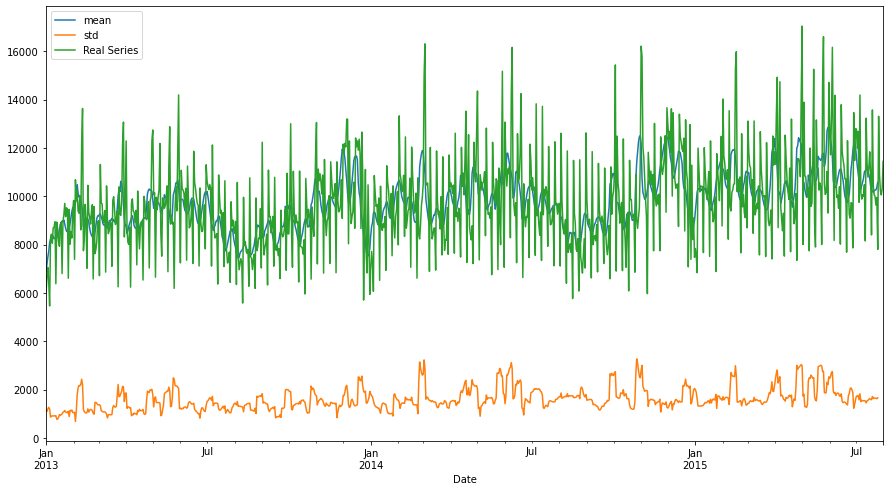

In [71]:
plt.figure(figsize=(15,8))
mean.plot(label='mean')
std.plot(label='std')
data1['Sales'].plot(label='Real Series')
plt.legend()
plt.show()

In [72]:
data1['Sales'].isnull().sum()

0

rolling mean is not stationary and varies with time, have to eliminate trend and seasonality

#### Augmented Dicky fullers test

In [73]:
# H0: series is non stationary
# H1: serires is stationary 
# threshold: 0.5

In [74]:
from statsmodels.tsa.stattools import adfuller

In [75]:
adfuller(data1['Sales'])

(-3.233442975068045,
 0.01812866520204994,
 21,
 920,
 {'1%': -3.4374778690219956,
  '5%': -2.864686684217556,
  '10%': -2.5684454926748583},
 15639.939314837035)

In [76]:
result=adfuller(data1['Sales'])
labels=['ADf Test Statics', 'p-value', 'lags used', 'No of observations used', 'Critical values']

for value,label in zip(result,labels):
    print("{} : {}".format(label,value))
    

ADf Test Statics : -3.233442975068045
p-value : 0.01812866520204994
lags used : 21
No of observations used : 920
Critical values : {'1%': -3.4374778690219956, '5%': -2.864686684217556, '10%': -2.5684454926748583}


In [77]:
def test_for_stationarity(feature):
    mean=data1[feature].rolling(window=7).mean()
    std=data1[feature].rolling(window=7).std()
    
    plt.figure(figsize=(15,8))
    mean.plot(label='mean')
    std.plot(label='std')
    data1[feature].plot(label='Real Series')
    plt.legend()
    plt.show()
    
    result=adfuller(data[feature].dropna())
    labels=['ADf Test Statics', 'p-value', 'lags used', 'No of observations used', 'Critical values']

    for value,label in zip(result,labels):
        print("{} : {}".format(label,value))
    
    
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis i.e we are rejecting the null hypothesis and we can state that our data is Stationary')
    else:
        print('Weak evidence against the null hypothesis i.e we are accepting the null hypothesis and we can state that our data is non-Stationary')
     

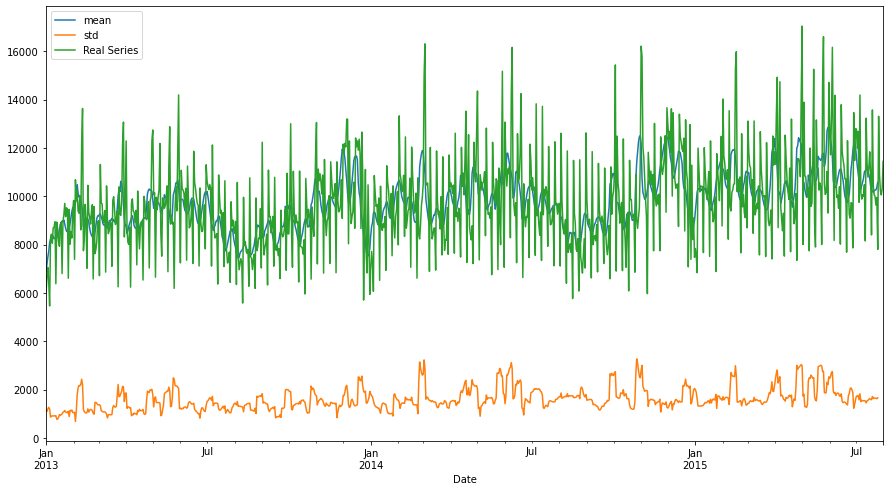

ADf Test Statics : -3.233442975068045
p-value : 0.01812866520204994
lags used : 21
No of observations used : 920
Critical values : {'1%': -3.4374778690219956, '5%': -2.864686684217556, '10%': -2.5684454926748583}
Strong evidence against the null hypothesis i.e we are rejecting the null hypothesis and we can state that our data is Stationary


In [78]:
test_for_stationarity('Sales')

<AxesSubplot:xlabel='Date'>

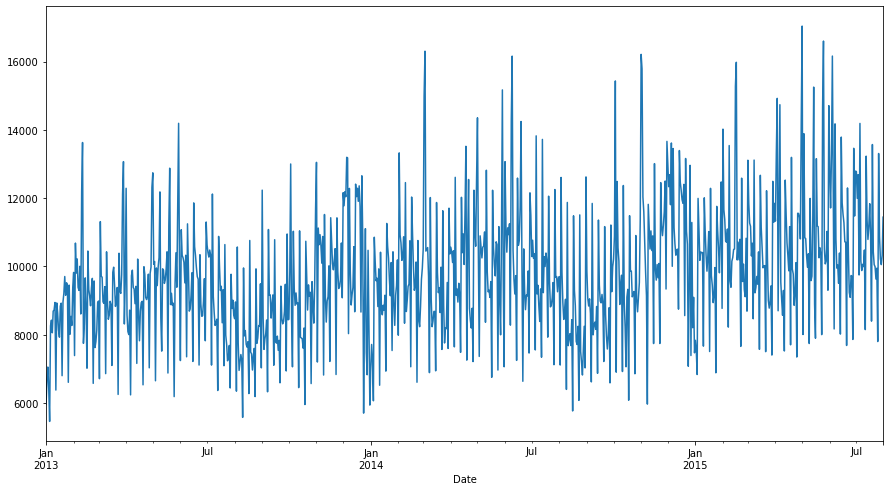

In [79]:
plt.figure(figsize=(15,8))
data1['Sales'].plot()

<AxesSubplot:xlabel='Date'>

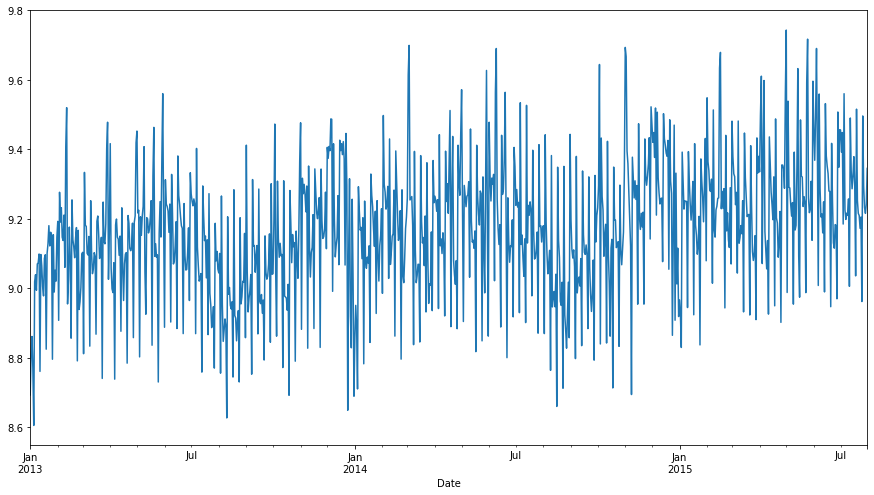

In [80]:
plt.figure(figsize=(15,8))
np.log(data1['Sales']).plot()

In [81]:
log_data=np.log(data1['Sales'])
log_data

Date
2015-07-31    9.345133
2015-07-30    9.242227
2015-07-29    9.215626
2015-07-28    9.232591
2015-07-27    9.294130
                ...   
2013-01-05    8.605204
2013-01-04    8.768730
2013-01-03    8.861208
2013-01-02    8.808070
2013-01-01    8.692994
Name: Sales, Length: 942, dtype: float64

In [82]:
rolling_avg=log_data-log_data.shift(7)
rolling_avg

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05   -0.155563
2013-01-04   -0.330008
2013-01-03   -0.212166
2013-01-02   -0.261973
2013-01-01   -0.301303
Name: Sales, Length: 942, dtype: float64

In [83]:
Rolling_average=log_data.rolling(window=7).mean()

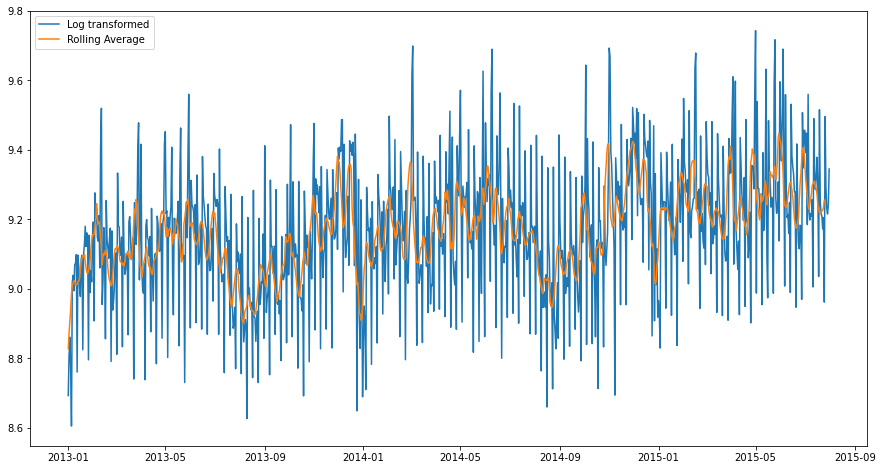

In [84]:
plt.figure(figsize=(15,8))
plt.plot(log_data, label='Log transformed')
plt.plot(Rolling_average, label='Rolling Average')
plt.legend()

In [85]:
lr_diff=log_data-Rolling_average

In [86]:
lr_diff

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05   -0.380463
2013-01-04   -0.169794
2013-01-03   -0.047006
2013-01-02   -0.062719
2013-01-01   -0.134752
Name: Sales, Length: 942, dtype: float64

In [87]:
data1['lr_diff']=lr_diff

In [88]:
log_ts=log_data-log_data.shift(7)
log_ts

Date
2015-07-31         NaN
2015-07-30         NaN
2015-07-29         NaN
2015-07-28         NaN
2015-07-27         NaN
                ...   
2013-01-05   -0.155563
2013-01-04   -0.330008
2013-01-03   -0.212166
2013-01-02   -0.261973
2013-01-01   -0.301303
Name: Sales, Length: 942, dtype: float64

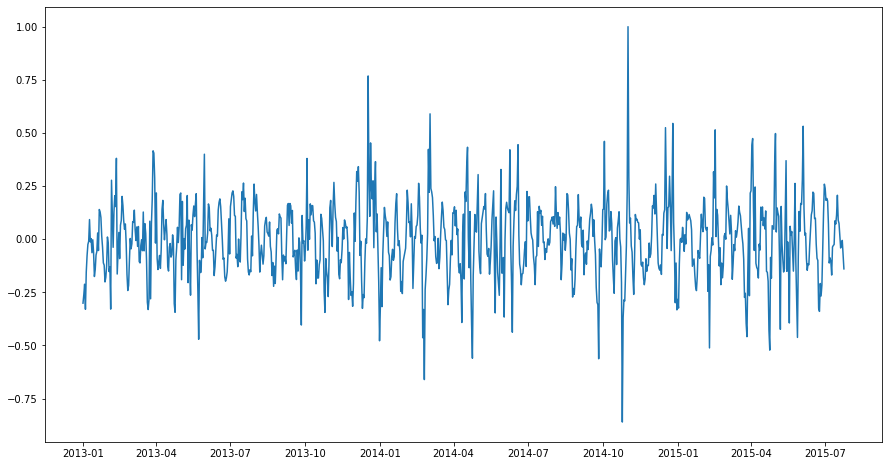

In [89]:
plt.figure(figsize=(15,8))
plt.plot(log_ts)

In [90]:
# With respect to seasonality this is my trend

In [91]:
data1['log_ts']=log_ts

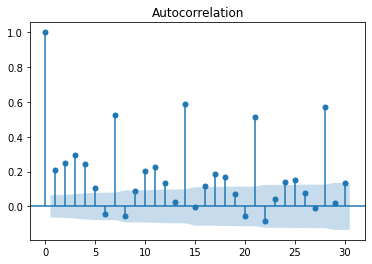

In [94]:
plot_acf(data1['Sales']);

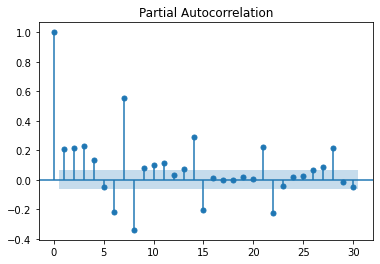

In [95]:
plot_pacf(data1['Sales']);

In [96]:
df2_decompose= seasonal_decompose(data['Sales'], model='additive')

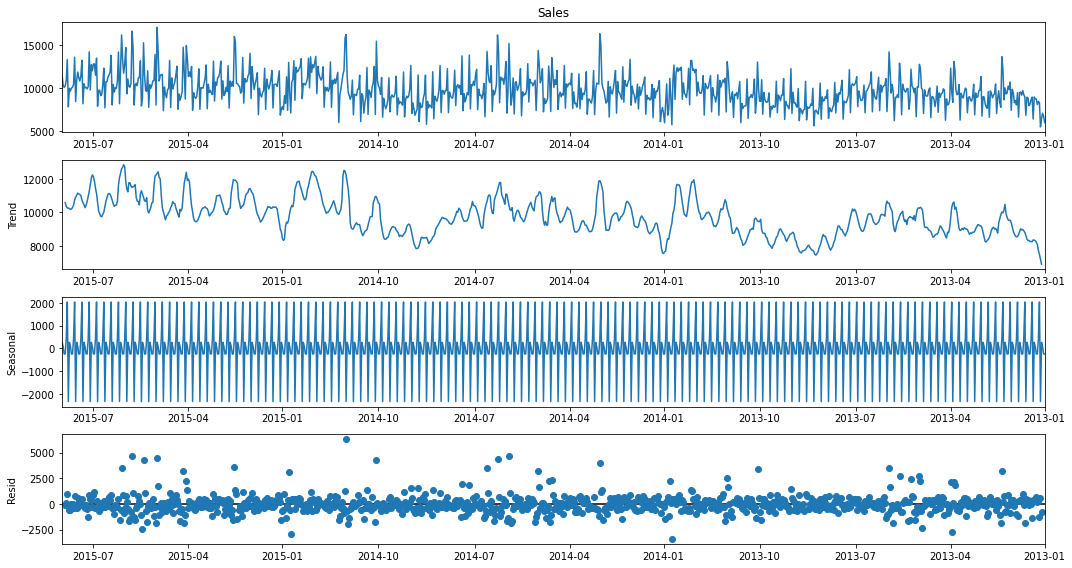

In [97]:
plt.rcParams['figure.figsize']=[15,8]
df2_decompose.plot();
plt.show()

Text(0.5, 0, 'Days')

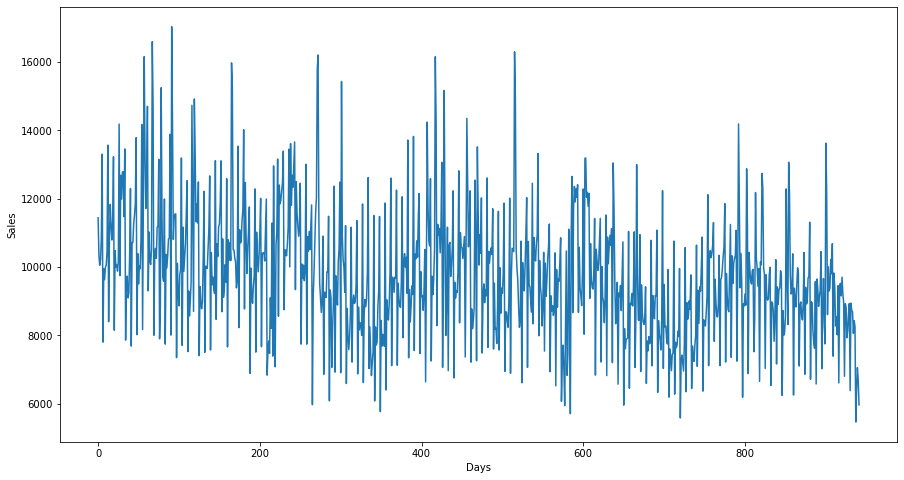

In [98]:
x=list(range(len(data2.index)))
y=data.Sales

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

In [99]:
## Let's apply fourier transform

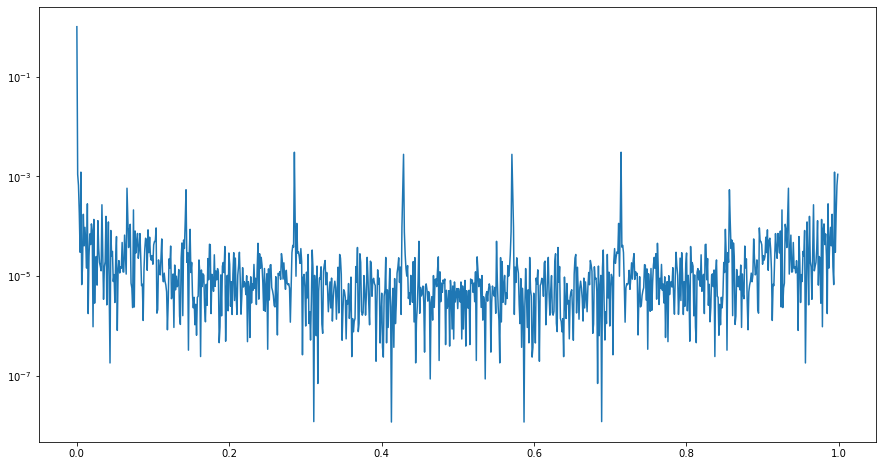

In [100]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

In [101]:
# Fourier transform with X-axix in days (also adding time period)

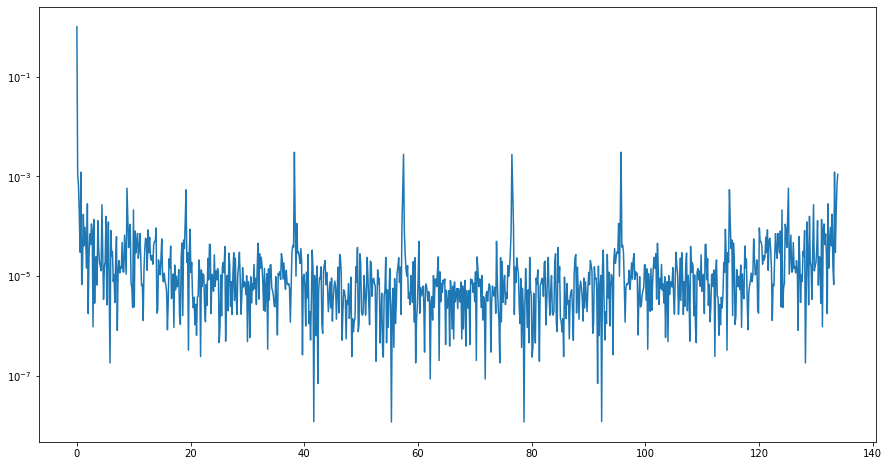

In [102]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/134)
plt.semilogy(results['period'], results['nspectrum'])

In [103]:
# Let's regroup the sales data to make the plot smoother

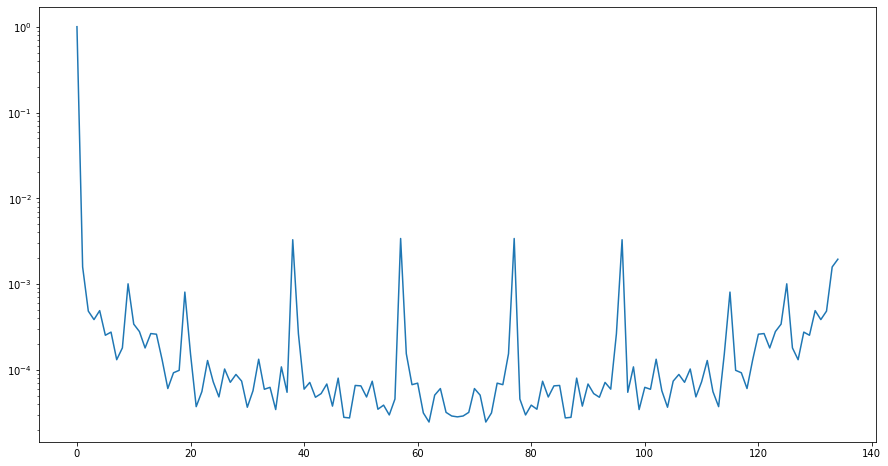

In [104]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.1,1))
data2=scaler.fit_transform(np.array(data2).reshape(-1,1))

In [106]:
data=data.reindex(index=data.index[::-1])

In [107]:
data

Sales
Date             
2013-01-01   5961
2013-01-02   6688
2013-01-03   7053
2013-01-04   6430
2013-01-05   5460
...           ...
2015-07-27  10874
2015-07-28  10225
2015-07-29  10053
2015-07-30  10324
2015-07-31  11443

[942 rows x 1 columns]

In [108]:
dataa=data.copy()

In [109]:
dataa

Sales
Date             
2013-01-01   5961
2013-01-02   6688
2013-01-03   7053
2013-01-04   6430
2013-01-05   5460
...           ...
2015-07-27  10874
2015-07-28  10225
2015-07-29  10053
2015-07-30  10324
2015-07-31  11443

[942 rows x 1 columns]

In [110]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.1,1))
dataa['Sales']=scaler.fit_transform(np.array(dataa['Sales']).reshape(-1,1))

In [111]:
train_end=datetime(2015,1,31)
test_end=datetime(2015,7,31)

In [112]:
dataa

Sales
Date                
2013-01-01  0.138941
2013-01-02  0.195449
2013-01-03  0.223819
2013-01-04  0.175395
2013-01-05  0.100000
...              ...
2015-07-27  0.520814
2015-07-28  0.470369
2015-07-29  0.457000
2015-07-30  0.478064
2015-07-31  0.565040

[942 rows x 1 columns]

In [113]:
train=dataa[:train_end]
test=dataa[train_end+timedelta(days=1):test_end]

In [114]:
data.shape

(942, 1)

In [115]:
train.shape

(761, 1)

In [116]:
test.shape

(181, 1)

***AR Model***

In [117]:
model_ar=ARMA(data['Sales'], order=(1,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar=model_ar.fit()

In [118]:
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(1, 0)   Log Likelihood               -8426.894
Method:                       css-mle   S.D. of innovations           1857.124
Date:                Tue, 22 Mar 2022   AIC                          16859.787
Time:                        12:36:56   BIC                          16874.331
Sample:                    01-01-2013   HQIC                         16865.331
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9744.1211     76.695    127.051      0.000    9593.802    9894.440
ar.L1.Sales     0.2113      0.032      6.621      0.000       0.149       0.274
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.7332           +0.0000j            4.7332            0.0000
-----------------------------------------------------------------------------
"""

In [119]:
model_ar_t=ARMA(train, order=(1,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_t=model_ar_t.fit()
result_ar_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(1, 0)   Log Likelihood                 429.857
Method:                       css-mle   S.D. of innovations              0.138
Date:                Tue, 22 Mar 2022   AIC                           -853.715
Time:                        12:37:01   BIC                           -839.811
Sample:                    01-01-2013   HQIC                          -848.361
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4135      0.006     67.506      0.000       0.401       0.425
ar.L1.Sales     0.1862      0.036      5.218      0.000       0.116       0.256
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.3699           +0.0000j            5.3699            0.0000
-----------------------------------------------------------------------------
"""

In [120]:
model_ar_2=ARMA(data['Sales'], order=(2,0)) 
result_ar_2=model_ar_2.fit()
result_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(2, 0)   Log Likelihood               -8404.209
Method:                       css-mle   S.D. of innovations           1812.842
Date:                Tue, 22 Mar 2022   AIC                          16816.418
Time:                        12:37:13   BIC                          16835.810
Sample:                    01-01-2013   HQIC                         16823.809
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9742.0380     95.694    101.804      0.000    9554.481    9929.595
ar.L1.Sales     0.1661      0.032      5.216      0.000       0.104       0.228
ar.L2.Sales     0.2173      0.032      6.819      0.000       0.155       0.280
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7968           +0.0000j            1.7968            0.0000
AR.2           -2.5609           +0.0000j            2.5609            0.5000
-----------------------------------------------------------------------------
"""

In [121]:
model_ar_2t=ARMA(train, order=(2,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_2t=model_ar_2t.fit()
result_ar_2t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(2, 0)   Log Likelihood                 446.611
Method:                       css-mle   S.D. of innovations              0.135
Date:                Tue, 22 Mar 2022   AIC                           -885.223
Time:                        12:37:15   BIC                           -866.684
Sample:                    01-01-2013   HQIC                          -878.084
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4133      0.008     54.608      0.000       0.399       0.428
ar.L1.Sales     0.1480      0.036      4.168      0.000       0.078       0.218
ar.L2.Sales     0.2084      0.036      5.854      0.000       0.139       0.278
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8639           +0.0000j            1.8639            0.0000
AR.2           -2.5738           +0.0000j            2.5738            0.5000
-----------------------------------------------------------------------------
"""

In [122]:
model_ar_3=ARMA(data['Sales'], order=(3,0)) 
result_ar_3=model_ar_3.fit()
result_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(3, 0)   Log Likelihood               -8378.756
Method:                       css-mle   S.D. of innovations           1764.361
Date:                Tue, 22 Mar 2022   AIC                          16767.513
Time:                        12:37:21   BIC                          16791.753
Sample:                    01-01-2013   HQIC                         16776.752
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9738.7532    121.124     80.403      0.000    9501.354    9976.153
ar.L1.Sales     0.1165      0.032      3.672      0.000       0.054       0.179
ar.L2.Sales     0.1803      0.031      5.734      0.000       0.119       0.242
ar.L3.Sales     0.2298      0.032      7.234      0.000       0.168       0.292
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3220           -0.0000j            1.3220           -0.0000
AR.2           -1.0532           -1.4773j            1.8143           -0.3486
AR.3           -1.0532           +1.4773j            1.8143            0.3486
-----------------------------------------------------------------------------
"""

In [123]:
model_ar_3t=ARMA(train, order=(3,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_3t=model_ar_3t.fit()
result_ar_3t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(3, 0)   Log Likelihood                 465.341
Method:                       css-mle   S.D. of innovations              0.131
Date:                Tue, 22 Mar 2022   AIC                           -920.681
Time:                        12:37:29   BIC                           -897.508
Sample:                    01-01-2013   HQIC                          -911.758
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4131      0.009     43.554      0.000       0.395       0.432
ar.L1.Sales     0.1026      0.035      2.898      0.004       0.033       0.172
ar.L2.Sales     0.1771      0.035      5.046      0.000       0.108       0.246
ar.L3.Sales     0.2201      0.036      6.198      0.000       0.150       0.290
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3484           -0.0000j            1.3484           -0.0000
AR.2           -1.0766           -1.4868j            1.8356           -0.3497
AR.3           -1.0766           +1.4868j            1.8356            0.3497
-----------------------------------------------------------------------------
"""

In [124]:
model_ar_4=ARMA(data['Sales'], order=(4,0)) 
result_ar_4=model_ar_4.fit()
result_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(4, 0)   Log Likelihood               -8369.786
Method:                       css-mle   S.D. of innovations           1747.566
Date:                Tue, 22 Mar 2022   AIC                          16751.571
Time:                        12:37:37   BIC                          16780.659
Sample:                    01-01-2013   HQIC                         16762.659
                         - 07-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9735.2820    139.441     69.816      0.000    9461.982       1e+04
ar.L1.Sales     0.0851      0.032      2.636      0.008       0.022       0.148
ar.L2.Sales     0.1560      0.032      4.929      0.000       0.094       0.218
ar.L3.Sales     0.2146      0.032      6.776      0.000       0.153       0.277
ar.L4.Sales     0.1376      0.032      4.256      0.000       0.074       0.201
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2072           -0.0000j            1.2072           -0.0000
AR.2           -0.3707           -1.6836j            1.7240           -0.2845
AR.3           -0.3707           +1.6836j            1.7240            0.2845
AR.4           -2.0252           -0.0000j            2.0252           -0.5000
-----------------------------------------------------------------------------
"""

In [125]:
model_ar_4t=ARMA(train, order=(4,0)) ## 1 indicates the no. of past values we wish to incorporate into the model and 0 indicates that we are not taking any of the residuals into consideration.
result_ar_4t=model_ar_4t.fit()
result_ar_4t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(4, 0)   Log Likelihood                 471.844
Method:                       css-mle   S.D. of innovations              0.130
Date:                Tue, 22 Mar 2022   AIC                           -931.688
Time:                        12:37:43   BIC                           -903.880
Sample:                    01-01-2013   HQIC                          -920.980
                         - 01-31-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4129      0.011     38.064      0.000       0.392       0.434
ar.L1.Sales     0.0742      0.036      2.063      0.039       0.004       0.145
ar.L2.Sales     0.1545      0.035      4.373      0.000       0.085       0.224
ar.L3.Sales     0.2076      0.035      5.867      0.000       0.138       0.277
ar.L4.Sales     0.1307      0.036      3.622      0.000       0.060       0.201
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2255           -0.0000j            1.2255           -0.0000
AR.2           -0.3853           -1.7051j            1.7481           -0.2854
AR.3           -0.3853           +1.7051j            1.7481            0.2854
AR.4           -2.0426           -0.0000j            2.0426           -0.5000
-----------------------------------------------------------------------------
"""

In [126]:
from scipy.stats.distributions import chi2

In [127]:
def LLR_test(mod_1,mod_2,DF=1):
    L1=mod_1.fit().llf
    L2=mod_2.fit().llf
    LR=(2*(L2-L1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [128]:
LLR_test(model_ar, model_ar_2)

0.0

In [129]:
LLR_test(model_ar_t, model_ar_2t)

0.0

In [130]:
LLR_test(model_ar_2, model_ar_3)

0.0

In [131]:
LLR_test(model_ar_2t, model_ar_3t)

0.0

In [132]:
LLR_test(model_ar_3, model_ar_4)

0.0

In [133]:
LLR_test(model_ar_3t, model_ar_4t)

0.0

In [134]:
model_ar_5=ARMA(data['Sales'], order=(5,0)) 
result_ar_5=model_ar_5.fit()
print(result_ar_5.summary())
print(LLR_test(model_ar_4, model_ar_5))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(5, 0)   Log Likelihood               -8368.751
Method:                       css-mle   S.D. of innovations           1745.638
Date:                Tue, 22 Mar 2022   AIC                          16751.502
Time:                        12:38:03   BIC                          16785.438
Sample:                    01-01-2013   HQIC                         16764.437
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9736.4216    132.852     73.288      0.000    9476.036    9996.808
ar.L1.Sales     0.0915      0.033      2.810      0.005       0.028       0.155
ar.L2.Sales     0.1659      0.032      5.128    

In [135]:
model_ar_5t=ARMA(train, order=(5,0)) 
result_ar_5t=model_ar_5t.fit()
print(result_ar_5t.summary())
print(LLR_test(model_ar_4t, model_ar_5t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(5, 0)   Log Likelihood                 472.922
Method:                       css-mle   S.D. of innovations              0.130
Date:                Tue, 22 Mar 2022   AIC                           -931.845
Time:                        12:38:11   BIC                           -899.402
Sample:                    01-01-2013   HQIC                          -919.353
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4130      0.010     40.248      0.000       0.393       0.433
ar.L1.Sales     0.0811      0.036      2.238      0.025       0.010       0.152
ar.L2.Sales     0.1653      0.036      4.587    

In [136]:
model_ar_6=ARMA(data['Sales'], order=(6,0)) 
result_ar_6=model_ar_6.fit()
print(result_ar_6.summary())
print(LLR_test(model_ar_5, model_ar_6))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(6, 0)   Log Likelihood               -8346.191
Method:                       css-mle   S.D. of innovations           1704.071
Date:                Tue, 22 Mar 2022   AIC                          16708.383
Time:                        12:38:19   BIC                          16747.167
Sample:                    01-01-2013   HQIC                         16723.166
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9740.4710    105.961     91.925      0.000    9532.791    9948.151
ar.L1.Sales     0.0810      0.032      2.546      0.011       0.019       0.143
ar.L2.Sales     0.1962      0.032      6.152    

In [137]:
model_ar_6t=ARMA(train, order=(6,0)) 
result_ar_6t=model_ar_6t.fit()
print(result_ar_6t.summary())
print(LLR_test(model_ar_5t, model_ar_6t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(6, 0)   Log Likelihood                 494.843
Method:                       css-mle   S.D. of innovations              0.126
Date:                Tue, 22 Mar 2022   AIC                           -973.686
Time:                        12:38:27   BIC                           -936.609
Sample:                    01-01-2013   HQIC                          -959.410
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4134      0.008     51.658      0.000       0.398       0.429
ar.L1.Sales     0.0685      0.035      1.947      0.052      -0.000       0.138
ar.L2.Sales     0.1965      0.035      5.566    

In [138]:
model_ar_7=ARMA(data['Sales'], order=(7,0)) 
result_ar_7=model_ar_7.fit()
print(result_ar_7.summary())
print(LLR_test(model_ar_6, model_ar_7))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(7, 0)   Log Likelihood               -8171.415
Method:                       css-mle   S.D. of innovations           1413.527
Date:                Tue, 22 Mar 2022   AIC                          16360.831
Time:                        12:38:32   BIC                          16404.463
Sample:                    01-01-2013   HQIC                         16377.462
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9714.0889    202.821     47.895      0.000    9316.566    1.01e+04
ar.L1.Sales     0.2014      0.027      7.467      0.000       0.149       0.254
ar.L2.Sales     0.2123      0.026      8.035    

In [139]:
model_ar_7t=ARMA(train, order=(7,0)) 
result_ar_7t=model_ar_7t.fit()
print(result_ar_7t.summary())
print(LLR_test(model_ar_6t, model_ar_7t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(7, 0)   Log Likelihood                 641.850
Method:                       css-mle   S.D. of innovations              0.104
Date:                Tue, 22 Mar 2022   AIC                          -1265.700
Time:                        12:38:38   BIC                          -1223.988
Sample:                    01-01-2013   HQIC                         -1249.638
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4120      0.016     26.250      0.000       0.381       0.443
ar.L1.Sales     0.2028      0.030      6.815      0.000       0.144       0.261
ar.L2.Sales     0.2165      0.029      7.464    

In [140]:
model_ar_8=ARMA(data['Sales'], order=(8,0)) 
result_ar_8=model_ar_8.fit()
print(result_ar_8.summary())
print(LLR_test(model_ar_7, model_ar_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(8, 0)   Log Likelihood               -8115.850
Method:                       css-mle   S.D. of innovations           1331.907
Date:                Tue, 22 Mar 2022   AIC                          16251.700
Time:                        12:38:54   BIC                          16300.180
Sample:                    01-01-2013   HQIC                         16270.179
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9733.4400    141.730     68.676      0.000    9455.654       1e+04
ar.L1.Sales     0.3886      0.031     12.661      0.000       0.328       0.449
ar.L2.Sales     0.1250      0.026      4.783    

In [141]:
model_ar_8t=ARMA(train, order=(8,0)) 
result_ar_8t=model_ar_8t.fit()
print(result_ar_8t.summary())
print(LLR_test(model_ar_7t, model_ar_8t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(8, 0)   Log Likelihood                 688.752
Method:                       css-mle   S.D. of innovations              0.098
Date:                Tue, 22 Mar 2022   AIC                          -1357.504
Time:                        12:39:01   BIC                          -1311.158
Sample:                    01-01-2013   HQIC                         -1339.658
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4132      0.011     38.126      0.000       0.392       0.434
ar.L1.Sales     0.3972      0.034     11.669      0.000       0.331       0.464
ar.L2.Sales     0.1233      0.029      4.286    

***MA Model***

In [142]:
model_ma_1=ARMA(data['Sales'], order=(0,1)) 
result_ma_1=model_ma_1.fit()
print(result_ma_1.summary())
##print(LLR_test(model_ar_7, model_ar_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 1)   Log Likelihood               -8433.020
Method:                       css-mle   S.D. of innovations           1869.263
Date:                Tue, 22 Mar 2022   AIC                          16872.041
Time:                        12:41:48   BIC                          16886.585
Sample:                    01-01-2013   HQIC                         16877.585
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9744.5998     70.388    138.441      0.000    9606.642    9882.558
ma.L1.Sales     0.1559      0.028      5.509      0.000       0.100       0.211
                                    Roots       

In [143]:
model_ma_2=ARMA(data['Sales'], order=(0,2)) 
result_ma_2=model_ma_2.fit()
print(result_ma_2.summary())
print(LLR_test(model_ma_1, model_ma_2))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 2)   Log Likelihood               -8421.556
Method:                       css-mle   S.D. of innovations           1846.630
Date:                Tue, 22 Mar 2022   AIC                          16851.113
Time:                        12:41:52   BIC                          16870.505
Sample:                    01-01-2013   HQIC                         16858.504
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9744.5998     75.691    128.742      0.000    9596.248    9892.952
ma.L1.Sales     0.1289      0.036      3.628      0.000       0.059       0.199
ma.L2.Sales     0.1295      0.026      4.928    

In [144]:
model_ma_3=ARMA(data['Sales'], order=(0,3)) 
result_ma_3=model_ma_3.fit()
print(result_ma_3.summary())
print(LLR_test(model_ma_2, model_ma_3))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 3)   Log Likelihood               -8365.365
Method:                       css-mle   S.D. of innovations           1739.005
Date:                Tue, 22 Mar 2022   AIC                          16740.731
Time:                        12:41:58   BIC                          16764.971
Sample:                    01-01-2013   HQIC                         16749.971
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9743.0202    102.712     94.857      0.000    9541.708    9944.333
ma.L1.Sales     0.1902      0.038      4.981      0.000       0.115       0.265
ma.L2.Sales     0.1501      0.040      3.788    

In [145]:
model_ma_4=ARMA(data['Sales'], order=(0,4)) 
result_ma_4=model_ma_4.fit()
print(result_ma_4.summary())
print(LLR_test(model_ma_3, model_ma_4))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 4)   Log Likelihood               -8359.883
Method:                       css-mle   S.D. of innovations           1728.819
Date:                Tue, 22 Mar 2022   AIC                          16731.767
Time:                        12:42:00   BIC                          16760.855
Sample:                    01-01-2013   HQIC                         16742.854
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9741.9798    107.218     90.861      0.000    9531.836    9952.124
ma.L1.Sales     0.2011      0.032      6.353      0.000       0.139       0.263
ma.L2.Sales     0.3062      0.040      7.572    

In [146]:
model_ma_5=ARMA(data['Sales'], order=(0,5)) 
result_ma_5=model_ma_5.fit()
print(result_ma_5.summary())
print(LLR_test(model_ma_4, model_ma_5))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 5)   Log Likelihood               -8344.323
Method:                       css-mle   S.D. of innovations           1700.268
Date:                Tue, 22 Mar 2022   AIC                          16702.647
Time:                        12:42:05   BIC                          16736.583
Sample:                    01-01-2013   HQIC                         16715.582
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9744.5997     94.989    102.587      0.000    9558.425    9930.774
ma.L1.Sales     0.1296      0.031      4.224      0.000       0.069       0.190
ma.L2.Sales     0.3927      0.032     12.287    

In [147]:
model_ma_6=ARMA(data['Sales'], order=(0,6)) 
result_ma_6=model_ma_6.fit()
print(result_ma_6.summary())
print(LLR_test(model_ma_5, model_ma_6))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 6)   Log Likelihood               -8314.886
Method:                       css-mle   S.D. of innovations           1647.567
Date:                Tue, 22 Mar 2022   AIC                          16645.772
Time:                        12:42:07   BIC                          16684.556
Sample:                    01-01-2013   HQIC                         16660.555
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9743.6043     93.695    103.993      0.000    9559.966    9927.243
ma.L1.Sales     0.4120      0.030     13.767      0.000       0.353       0.471
ma.L2.Sales     0.2124      0.033      6.405    

In [148]:
model_ma_7=ARMA(data['Sales'], order=(0,7)) 
result_ma_7=model_ma_7.fit()
print(result_ma_7.summary())
print(LLR_test(model_ma_6, model_ma_7))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 7)   Log Likelihood               -8246.973
Method:                       css-mle   S.D. of innovations           1532.712
Date:                Tue, 22 Mar 2022   AIC                          16511.946
Time:                        12:42:11   BIC                          16555.578
Sample:                    01-01-2013   HQIC                         16528.577
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9738.7892    120.726     80.668      0.000    9502.170    9975.409
ma.L1.Sales     0.2846      0.030      9.521      0.000       0.226       0.343
ma.L2.Sales     0.2376      0.034      7.068    

In [149]:
model_ma_8=ARMA(data['Sales'], order=(0,8)) 
result_ma_8=model_ma_8.fit()
print(result_ma_8.summary())
print(LLR_test(model_ma_7, model_ma_8))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  942
Model:                     ARMA(0, 8)   Log Likelihood               -8244.864
Method:                       css-mle   S.D. of innovations           1529.247
Date:                Tue, 22 Mar 2022   AIC                          16509.729
Time:                        12:42:17   BIC                          16558.209
Sample:                    01-01-2013   HQIC                         16528.208
                         - 07-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9738.5952    113.985     85.437      0.000    9515.189    9962.002
ma.L1.Sales     0.2534      0.033      7.626      0.000       0.188       0.319
ma.L2.Sales     0.2533      0.033      7.678    

In [150]:
model_ma_t=ARMA(train, order=(0,1)) 
result_ma_t=model_ma_t.fit()
print(result_ma_t.summary())
#print(LLR_test(model_ma_t, model_ma_2))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 1)   Log Likelihood                 426.147
Method:                       css-mle   S.D. of innovations              0.138
Date:                Tue, 22 Mar 2022   AIC                           -846.295
Time:                        12:42:25   BIC                           -832.391
Sample:                    01-01-2013   HQIC                          -840.941
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4135      0.006     72.516      0.000       0.402       0.425
ma.L1.Sales     0.1383      0.032      4.375      0.000       0.076       0.200
                                    Roots       

In [151]:
model_ma_2t=ARMA(train, order=(0,2)) 
result_ma_2t=model_ma_2t.fit()
print(result_ma_2t.summary())
print(LLR_test(model_ma_t, model_ma_2t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 2)   Log Likelihood                 434.881
Method:                       css-mle   S.D. of innovations              0.137
Date:                Tue, 22 Mar 2022   AIC                           -861.763
Time:                        12:42:28   BIC                           -843.224
Sample:                    01-01-2013   HQIC                          -854.624
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4135      0.006     67.535      0.000       0.401       0.425
ma.L1.Sales     0.1093      0.040      2.753      0.006       0.031       0.187
ma.L2.Sales     0.1273      0.030      4.277    

In [152]:
model_ma_3t=ARMA(train, order=(0,3)) 
result_ma_3t=model_ma_3t.fit()
print(result_ma_3t.summary())
print(LLR_test(model_ma_2t, model_ma_3t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 3)   Log Likelihood                 479.188
Method:                       css-mle   S.D. of innovations              0.129
Date:                Tue, 22 Mar 2022   AIC                           -948.376
Time:                        12:42:30   BIC                           -925.203
Sample:                    01-01-2013   HQIC                          -939.453
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4134      0.008     49.065      0.000       0.397       0.430
ma.L1.Sales     0.1820      0.043      4.272      0.000       0.098       0.265
ma.L2.Sales     0.1397      0.044      3.170    

In [153]:
model_ma_4t=ARMA(train, order=(0,4)) 
result_ma_4t=model_ma_4t.fit()
print(result_ma_4t.summary())
print(LLR_test(model_ma_3t, model_ma_4t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 4)   Log Likelihood                 486.006
Method:                       css-mle   S.D. of innovations              0.128
Date:                Tue, 22 Mar 2022   AIC                           -960.013
Time:                        12:42:31   BIC                           -932.205
Sample:                    01-01-2013   HQIC                          -949.305
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4133      0.009     46.560      0.000       0.396       0.431
ma.L1.Sales     0.2092      0.035      5.896      0.000       0.140       0.279
ma.L2.Sales     0.3079      0.047      6.602    

In [154]:
model_ma_5t=ARMA(train, order=(0,5)) 
result_ma_5t=model_ma_5t.fit()
print(result_ma_5t.summary())
print(LLR_test(model_ma_4t, model_ma_5t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 5)   Log Likelihood                 502.568
Method:                       css-mle   S.D. of innovations              0.125
Date:                Tue, 22 Mar 2022   AIC                           -991.137
Time:                        12:42:32   BIC                           -958.694
Sample:                    01-01-2013   HQIC                          -978.644
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4135      0.008     54.141      0.000       0.399       0.428
ma.L1.Sales     0.1199      0.034      3.528      0.000       0.053       0.186
ma.L2.Sales     0.3979      0.035     11.510    

In [155]:
model_ma_6t=ARMA(train, order=(0,6)) 
result_ma_6t=model_ma_6t.fit()
print(result_ma_6t.summary())
print(LLR_test(model_ma_5t, model_ma_6t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 6)   Log Likelihood                 523.399
Method:                       css-mle   S.D. of innovations              0.122
Date:                Tue, 22 Mar 2022   AIC                          -1030.797
Time:                        12:42:35   BIC                           -993.720
Sample:                    01-01-2013   HQIC                         -1016.520
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4135      0.007     55.374      0.000       0.399       0.428
ma.L1.Sales     0.3926      0.033     11.762      0.000       0.327       0.458
ma.L2.Sales     0.1976      0.035      5.567    

In [156]:
model_ma_7t=ARMA(train, order=(0,7)) 
result_ma_7t=model_ma_7t.fit()
print(result_ma_7t.summary())
print(LLR_test(model_ma_6t, model_ma_7t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 7)   Log Likelihood                 575.123
Method:                       css-mle   S.D. of innovations              0.113
Date:                Tue, 22 Mar 2022   AIC                          -1132.246
Time:                        12:42:38   BIC                          -1090.534
Sample:                    01-01-2013   HQIC                         -1116.184
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4132      0.009     43.663      0.000       0.395       0.432
ma.L1.Sales     0.2902      0.034      8.521      0.000       0.223       0.357
ma.L2.Sales     0.2083      0.037      5.566    

In [157]:
model_ma_8t=ARMA(train, order=(0,8)) 
result_ma_8t=model_ma_8t.fit()
print(result_ma_8t.summary())
print(LLR_test(model_ma_7t, model_ma_8t))

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(0, 8)   Log Likelihood                 578.363
Method:                       css-mle   S.D. of innovations              0.113
Date:                Tue, 22 Mar 2022   AIC                          -1136.725
Time:                        12:42:46   BIC                          -1090.379
Sample:                    01-01-2013   HQIC                         -1118.879
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4133      0.009     46.825      0.000       0.396       0.431
ma.L1.Sales     0.2556      0.036      7.089      0.000       0.185       0.326
ma.L2.Sales     0.2371      0.037      6.412    

In [419]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [420]:
pred_start

Timestamp('2015-02-01 00:00:00')

In [421]:
pred_end

Timestamp('2015-07-31 00:00:00')

In [422]:
len(test)

181

In [423]:
predictions=result_ma_8t.predict(start=pred_start, end=pred_end)

In [424]:
predictions

2015-02-01    0.499186
2015-02-02    0.475749
2015-02-03    0.439343
2015-02-04    0.392883
2015-02-05    0.418663
                ...   
2015-07-27    0.413255
2015-07-28    0.413255
2015-07-29    0.413255
2015-07-30    0.413255
2015-07-31    0.413255
Freq: D, Length: 181, dtype: float64

In [425]:
pred=predictions.cumsum()
pred

2015-02-01     0.499186
2015-02-02     0.974935
2015-02-03     1.414278
2015-02-04     1.807161
2015-02-05     2.225824
                ...    
2015-07-27    73.330372
2015-07-28    73.743627
2015-07-29    74.156882
2015-07-30    74.570137
2015-07-31    74.983392
Freq: D, Length: 181, dtype: float64

In [426]:
ma_pred=pd.DataFrame(pred, columns=train.columns)
ma_pred

Sales
2015-02-01   0.499186
2015-02-02   0.974935
2015-02-03   1.414278
2015-02-04   1.807161
2015-02-05   2.225824
...               ...
2015-07-27  73.330372
2015-07-28  73.743627
2015-07-29  74.156882
2015-07-30  74.570137
2015-07-31  74.983392

[181 rows x 1 columns]

In [427]:
pred_str=ma_pred.copy()
columns=train.columns
for col in columns:
    pred_str[str(col+'_forecast')]=train[col].iloc[-1]+pred_str[str(col)]

In [428]:
len(pred_str)

181

In [429]:
pred_str

Sales  Sales_forecast
2015-02-01   0.499186        0.856540
2015-02-02   0.974935        1.332289
2015-02-03   1.414278        1.771632
2015-02-04   1.807161        2.164515
2015-02-05   2.225824        2.583178
...               ...             ...
2015-07-27  73.330372       73.687726
2015-07-28  73.743627       74.100981
2015-07-29  74.156882       74.514236
2015-07-30  74.570137       74.927491
2015-07-31  74.983392       75.340746

[181 rows x 2 columns]

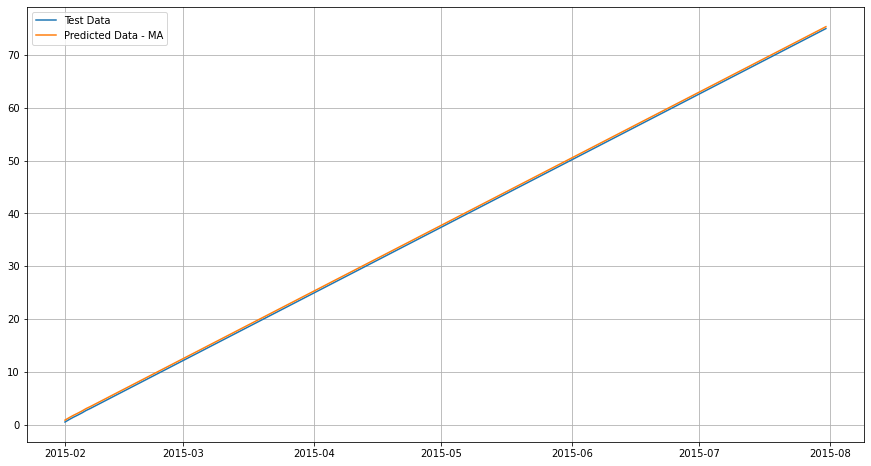

In [430]:
plt.plot(pred_str['Sales'],label='Test Data')
plt.plot(test.index,pred_str['Sales_forecast'],label='Predicted Data - MA')
plt.legend(loc='best')
plt.grid();

In [431]:
from sklearn.metrics import mean_squared_error

In [432]:
rmse= mean_squared_error(pred_str['Sales'], pred_str['Sales_forecast'], squared=False)
rmse

0.3573538302098612

In [433]:
def MAPE(y_true, y_predict):
    return np.mean((np.abs(y_true-y_predict))/(y_true))*100

In [434]:
mape=MAPE(pred_str['Sales'], pred_str['Sales_forecast'])
mape

2.5687245282628264

In [435]:
residuals=test.Sales-predictions
residuals

Date
2015-02-01    0.266234
2015-02-02    0.106391
2015-02-03    0.120334
2015-02-04    0.117593
2015-02-05    0.089248
                ...   
2015-07-27    0.107558
2015-07-28    0.057114
2015-07-29    0.043745
2015-07-30    0.064809
2015-07-31    0.151785
Length: 181, dtype: float64

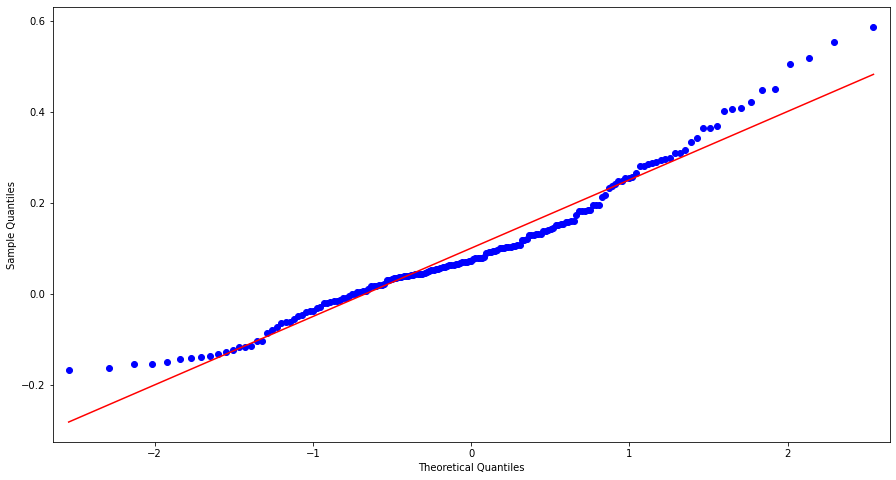

In [436]:
qqplot(residuals, line='s');

In [207]:
# acf-1,5               (3 0r 5)
# pacf- 1,2,4,5         (4 0r 3)
# (3,3) or (3,5) or (4,3) or (4,5)

***ARMA Model***

In [440]:
model=ARMA(train,(4,5))
model_fit=model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  761
Model:                     ARMA(4, 5)   Log Likelihood                 662.047
Method:                       css-mle   S.D. of innovations              0.100
Date:                Tue, 22 Mar 2022   AIC                          -1302.094
Time:                        12:59:21   BIC                          -1251.113
Sample:                    01-01-2013   HQIC                         -1282.463
                         - 01-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4129      0.005     75.618      0.000       0.402       0.424
ar.L1.Sales    -2.0688      0.004   -547.681      0.000      -2.076      -2.061
ar.L2.Sales    -2.5389      0.004   -567.599    

In [441]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [442]:
pred_start

Timestamp('2015-02-01 00:00:00')

In [443]:
pred_end

Timestamp('2015-07-31 00:00:00')

In [444]:
len(test)

181

In [445]:
predictions=model_fit.predict(start=pred_start, end=pred_end)

In [446]:
predictions

2015-02-01    0.534069
2015-02-02    0.435291
2015-02-03    0.361558
2015-02-04    0.387677
2015-02-05    0.461174
                ...   
2015-07-27    0.481202
2015-07-28    0.348075
2015-07-29    0.373531
2015-07-30    0.495310
2015-07-31    0.415670
Freq: D, Length: 181, dtype: float64

In [447]:
pred=predictions.cumsum()
pred

2015-02-01     0.534069
2015-02-02     0.969360
2015-02-03     1.330918
2015-02-04     1.718594
2015-02-05     2.179768
                ...    
2015-07-27    73.246891
2015-07-28    73.594966
2015-07-29    73.968497
2015-07-30    74.463807
2015-07-31    74.879476
Freq: D, Length: 181, dtype: float64

In [448]:
Arma_pred=pd.DataFrame(pred, columns=train.columns)
Arma_pred

Sales
2015-02-01   0.534069
2015-02-02   0.969360
2015-02-03   1.330918
2015-02-04   1.718594
2015-02-05   2.179768
...               ...
2015-07-27  73.246891
2015-07-28  73.594966
2015-07-29  73.968497
2015-07-30  74.463807
2015-07-31  74.879476

[181 rows x 1 columns]

In [449]:
pred_str=Arma_pred.copy()
columns=train.columns
for col in columns:
    pred_str[str(col+'_forecast')]=train[col].iloc[-1]+pred_str[str(col)]

In [450]:
len(pred_str)

181

In [451]:
pred_str

Sales  Sales_forecast
2015-02-01   0.534069        0.891423
2015-02-02   0.969360        1.326714
2015-02-03   1.330918        1.688271
2015-02-04   1.718594        2.075948
2015-02-05   2.179768        2.537122
...               ...             ...
2015-07-27  73.246891       73.604245
2015-07-28  73.594966       73.952320
2015-07-29  73.968497       74.325851
2015-07-30  74.463807       74.821160
2015-07-31  74.879476       75.236830

[181 rows x 2 columns]

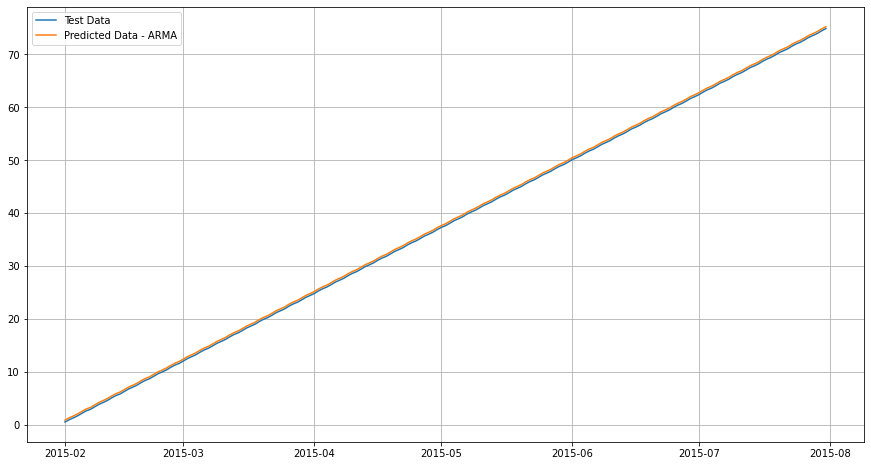

In [452]:
plt.plot(pred_str['Sales'],label='Test Data')
plt.plot(test.index,pred_str['Sales_forecast'],label='Predicted Data - ARMA')
plt.legend(loc='best')
plt.grid();

In [453]:
rmse= mean_squared_error(pred_str['Sales'], pred_str['Sales_forecast'], squared=False)
rmse

0.3573538302098612

In [454]:
mape=MAPE(pred_str['Sales'], pred_str['Sales_forecast'])
mape

2.5771545526173214

In [455]:
residuals=test.Sales-predictions
residuals

Date
2015-02-01    0.231351
2015-02-02    0.146849
2015-02-03    0.198119
2015-02-04    0.122799
2015-02-05    0.046737
                ...   
2015-07-27    0.039612
2015-07-28    0.122294
2015-07-29    0.083469
2015-07-30   -0.017246
2015-07-31    0.149370
Length: 181, dtype: float64

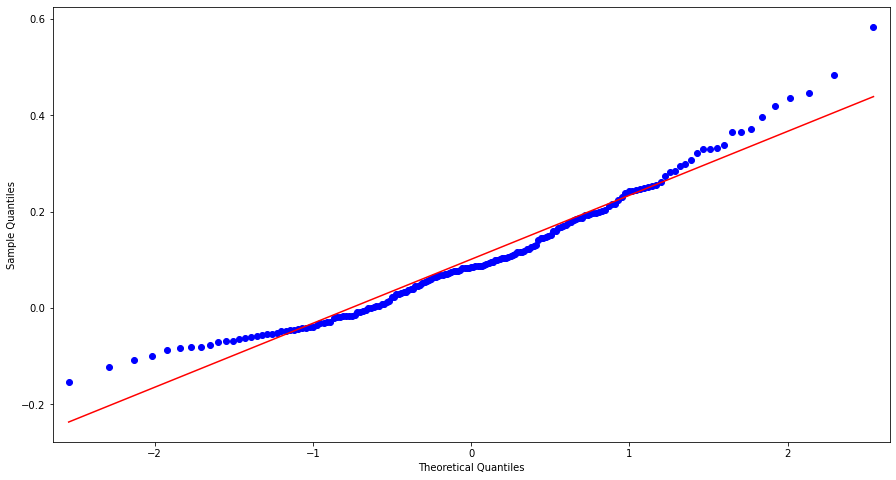

In [456]:
qqplot(residuals, line='s');

In [457]:
final_pred=model_fit.forecast(260)

In [458]:
fv=final_pred[0]
fv

array([0.53406894, 0.43529109, 0.36155757, 0.38767655, 0.46117385,
       0.4610654 , 0.28298748, 0.48431729, 0.46013997, 0.35291474,
       0.3814809 , 0.47829724, 0.43825771, 0.30606321, 0.46551994,
       0.47177898, 0.34933037, 0.37785661, 0.48711518, 0.42683714,
       0.31742944, 0.45643944, 0.47720003, 0.34790935, 0.37579615,
       0.49162745, 0.4211314 , 0.32303125, 0.4520533 , 0.47970479,
       0.34739109, 0.37465078, 0.49391671, 0.41828832, 0.32579963,
       0.44993085, 0.48084716, 0.34723689, 0.37402657, 0.49506248,
       0.41687659, 0.32717738, 0.44889788, 0.48135587, 0.34722212,
       0.37369325, 0.49562204, 0.41617927, 0.32787363, 0.44838818,
       0.48157129, 0.34725636, 0.37351979, 0.49588203, 0.41583792,
       0.32823643, 0.4481293 , 0.48165174, 0.34730502, 0.37343308,
       0.49598938, 0.41567364, 0.32843632, 0.44799038, 0.48167044,
       0.34735601, 0.37339297, 0.49601917, 0.41559729, 0.32855673,
       0.44790869, 0.48166113, 0.34740577, 0.37337768, 0.49600

In [459]:
len(fv)

260

In [460]:
ff=pd.DataFrame(fv, columns=['Forecast'])

In [461]:
ff

Forecast
0    0.534069
1    0.435291
2    0.361558
3    0.387677
4    0.461174
..        ...
255  0.373665
256  0.494770
257  0.415776
258  0.329840
259  0.447061

[260 rows x 1 columns]

In [462]:
date = pd.date_range(start='2015/02/01', periods=260, freq='D')
date

DatetimeIndex(['2015-02-01', '2015-02-02', '2015-02-03', '2015-02-04',
               '2015-02-05', '2015-02-06', '2015-02-07', '2015-02-08',
               '2015-02-09', '2015-02-10',
               ...
               '2015-10-09', '2015-10-10', '2015-10-11', '2015-10-12',
               '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
               '2015-10-17', '2015-10-18'],
              dtype='datetime64[ns]', length=260, freq='D')

In [463]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [464]:
ff=ff.set_index('Time_Stamp')

In [465]:
ff

Forecast
Time_Stamp          
2015-02-01  0.534069
2015-02-02  0.435291
2015-02-03  0.361558
2015-02-04  0.387677
2015-02-05  0.461174
...              ...
2015-10-14  0.373665
2015-10-15  0.494770
2015-10-16  0.415776
2015-10-17  0.329840
2015-10-18  0.447061

[260 rows x 1 columns]

In [466]:
final_value=scaler.inverse_transform(ff[['Forecast']])
final_value

array([[11044.53808952],
       [ 9773.70620234],
       [ 8825.083433  ],
       [ 9161.11860718],
       [10106.70220056],
       [10105.30691365],
       [ 7814.23561741],
       [10404.4554298 ],
       [10093.40077045],
       [ 8713.88865174],
       [ 9081.40819392],
       [10327.00410824],
       [ 9811.87330191],
       [ 8111.11770595],
       [10162.61703358],
       [10243.14306429],
       [ 8667.77379058],
       [ 9034.77961557],
       [10440.45182908],
       [ 9664.9414069 ],
       [ 8257.35052646],
       [10045.79138357],
       [10312.88798547],
       [ 8649.49151016],
       [ 9008.27065546],
       [10498.50474675],
       [ 9591.53389785],
       [ 8329.42099604],
       [ 9989.36128964],
       [10345.11302859],
       [ 8642.8238734 ],
       [ 8993.53486666],
       [10527.95732204],
       [ 9554.95610462],
       [ 8365.03774064],
       [ 9962.05482166],
       [10359.81026061],
       [ 8640.83988968],
       [ 8985.50407809],
       [10542.69823728],


In [467]:
kk=pd.DataFrame(final_value, columns=['Final_forecast'])

In [468]:
kk

Final_forecast
0      11044.538090
1       9773.706202
2       8825.083433
3       9161.118607
4      10106.702201
..              ...
255     8980.851175
256    10538.941737
257     9522.627544
258     8417.015941
259     9925.130235

[260 rows x 1 columns]

In [469]:
kk['Time_Stamp'] = pd.DataFrame(date)

In [470]:
kk=kk.set_index('Time_Stamp')

In [471]:
kk

Final_forecast
Time_Stamp                
2015-02-01    11044.538090
2015-02-02     9773.706202
2015-02-03     8825.083433
2015-02-04     9161.118607
2015-02-05    10106.702201
...                    ...
2015-10-14     8980.851175
2015-10-15    10538.941737
2015-10-16     9522.627544
2015-10-17     8417.015941
2015-10-18     9925.130235

[260 rows x 1 columns]

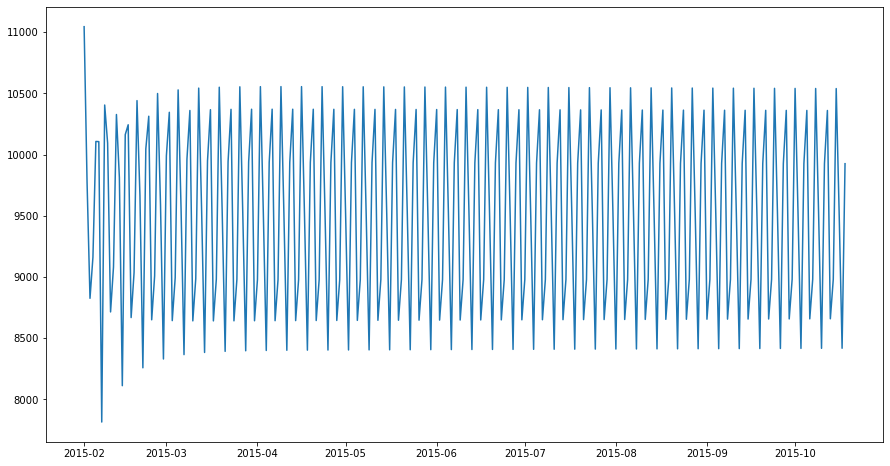

In [472]:
plt.plot(kk)

Text(0.5, 0, 'Days')

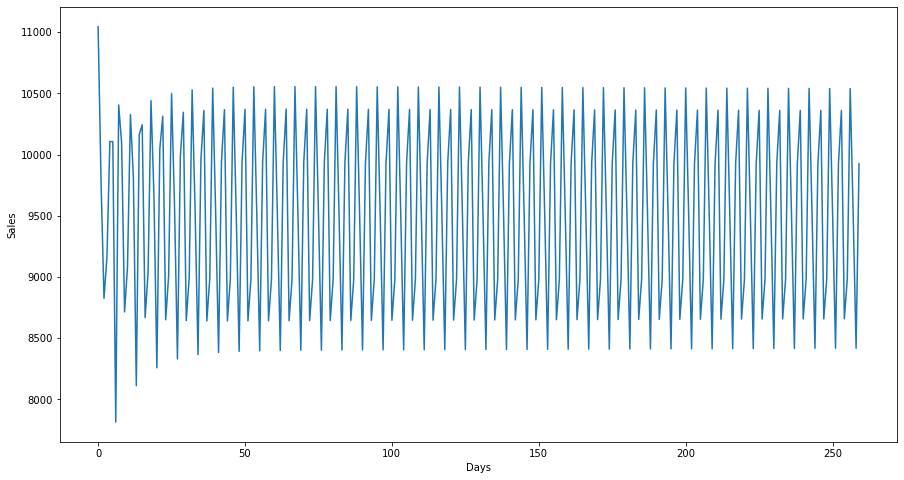

In [473]:
x=list(range(len(kk.Final_forecast.index)))
y=kk.Final_forecast

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

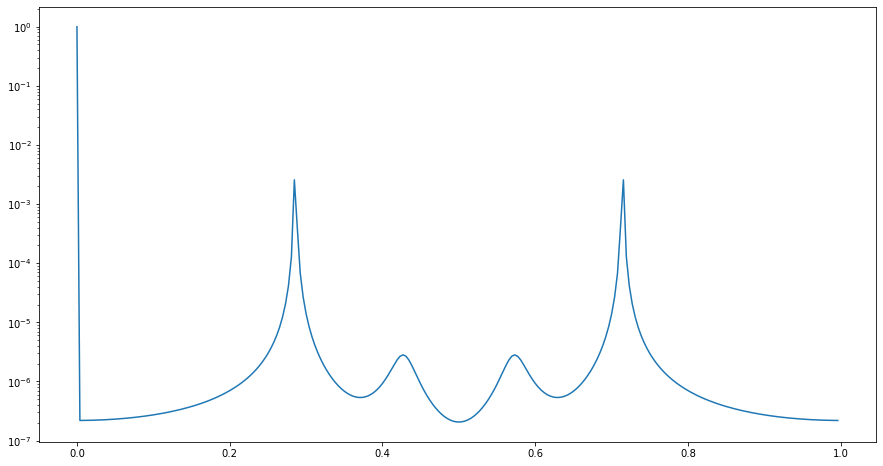

In [474]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

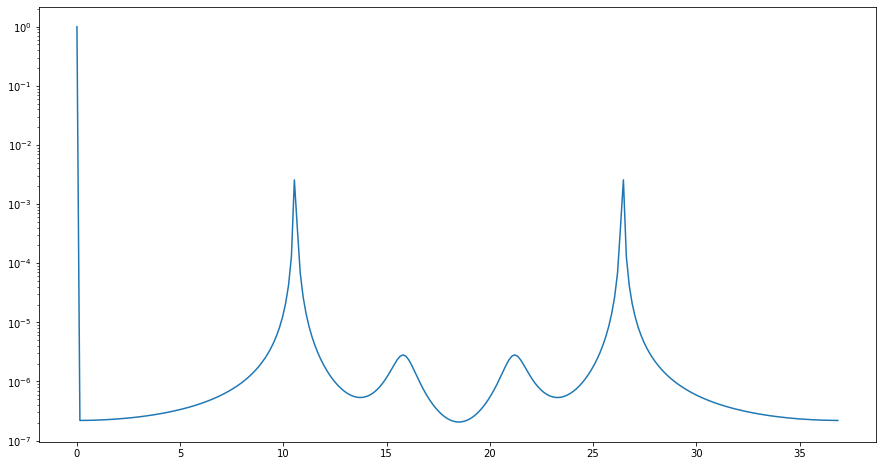

In [475]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/37)
plt.semilogy(results['period'], results['nspectrum'])

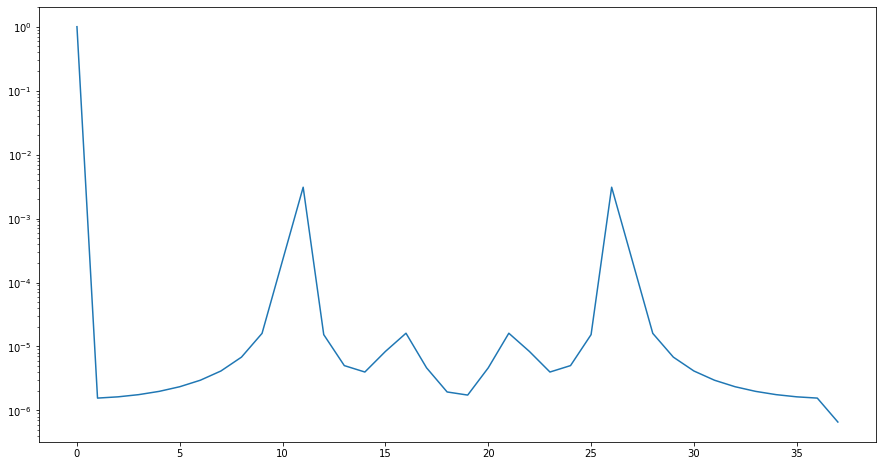

In [476]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)

***SARIMA Model***

In [477]:
import itertools
p = q = range(0, 6)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 7)
Model: (0, 0, 1)(0, 0, 2, 7)
Model: (0, 0, 2)(0, 0, 3, 7)
Model: (0, 0, 2)(0, 0, 4, 7)


In [478]:
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [479]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 7)12 - AIC:900.096467231765
SARIMA(0, 0, 0)x(0, 0, 1, 7)12 - AIC:282.3934267465041
SARIMA(0, 0, 0)x(0, 0, 2, 7)12 - AIC:-116.6655610495005
SARIMA(0, 0, 0)x(0, 0, 3, 7)12 - AIC:-283.54280149795784
SARIMA(0, 0, 0)x(0, 0, 4, 7)12 - AIC:-471.94652617749693
SARIMA(0, 0, 0)x(0, 0, 5, 7)12 - AIC:-558.0537339243458
SARIMA(0, 0, 0)x(1, 0, 0, 7)12 - AIC:-883.5093263221166
SARIMA(0, 0, 0)x(1, 0, 1, 7)12 - AIC:-1258.773174337858
SARIMA(0, 0, 0)x(1, 0, 2, 7)12 - AIC:-1252.1195123603686
SARIMA(0, 0, 0)x(1, 0, 3, 7)12 - AIC:-1247.6545662658432
SARIMA(0, 0, 0)x(1, 0, 4, 7)12 - AIC:-1235.1018569945495
SARIMA(0, 0, 0)x(1, 0, 5, 7)12 - AIC:-1242.8208347652226
SARIMA(0, 0, 0)x(2, 0, 0, 7)12 - AIC:-1121.5811959637913
SARIMA(0, 0, 0)x(2, 0, 1, 7)12 - AIC:-1254.8491655712062
SARIMA(0, 0, 0)x(2, 0, 2, 7)12 - AIC:-1252.0396689611116
SARIMA(0, 0, 0)x(2, 0, 3, 7)12 - AIC:-1245.553065548187
SARIMA(0, 0, 0)x(2, 0, 4, 7)12 - AIC:-1230.6195329134207
SARIMA(0, 0, 0)x(2, 0, 5, 7)12 - AIC:-123

In [481]:
dfObj2.sort_values(by=['AIC'])

param      seasonal          AIC
259   (1, 0, 1)  (1, 0, 1, 7) -1605.383710
475   (2, 0, 1)  (1, 0, 1, 7) -1604.072831
439   (2, 0, 0)  (1, 0, 1, 7) -1603.417362
655   (3, 0, 0)  (1, 0, 1, 7) -1603.239212
295   (1, 0, 2)  (1, 0, 1, 7) -1601.877817
...         ...           ...          ...
1207  (5, 0, 3)  (3, 0, 1, 7)  -106.890778
72    (0, 0, 2)  (0, 0, 0, 7)   -39.235483
1     (0, 0, 0)  (0, 0, 1, 7)   282.393427
36    (0, 0, 1)  (0, 0, 0, 7)   293.100230
0     (0, 0, 0)  (0, 0, 0, 7)   900.096467

[1296 rows x 3 columns]

In [482]:
model = sm.tsa.statespace.SARIMAX(train,
                                order=(1,0,1),
                                seasonal_order=(1,0,1,7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Sales   No. Observations:                  761
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood                 807.692
Date:                           Tue, 22 Mar 2022   AIC                          -1605.384
Time:                                   15:21:56   BIC                          -1582.270
Sample:                               01-01-2013   HQIC                         -1596.479
                                    - 01-31-2015                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7312      0.040     18.178      0.000       0.652       0.810
ma.L1         -0.1981      0.052     -3.807

In [483]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

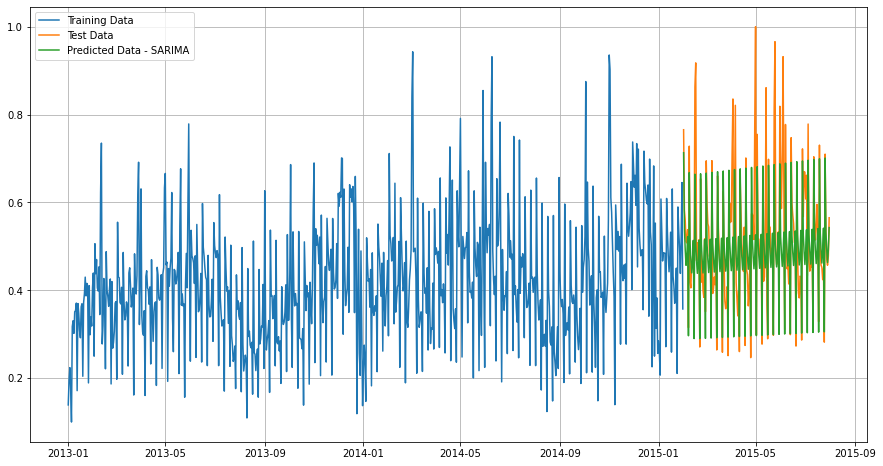

In [484]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

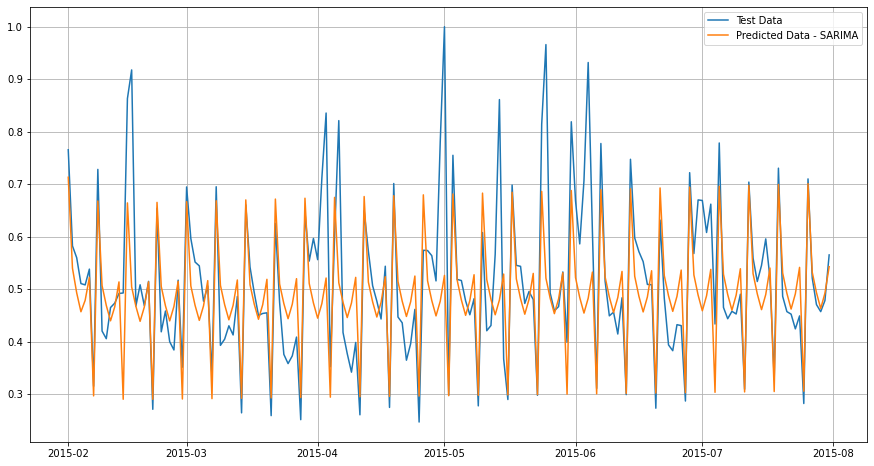

In [485]:
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [486]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sales'],SARIMA_predictions, squared=False)
print(rmse)

0.10893335301363598


In [487]:
mape = MAPE(test['Sales'],SARIMA_predictions)
print(mape)

12.648979990770231


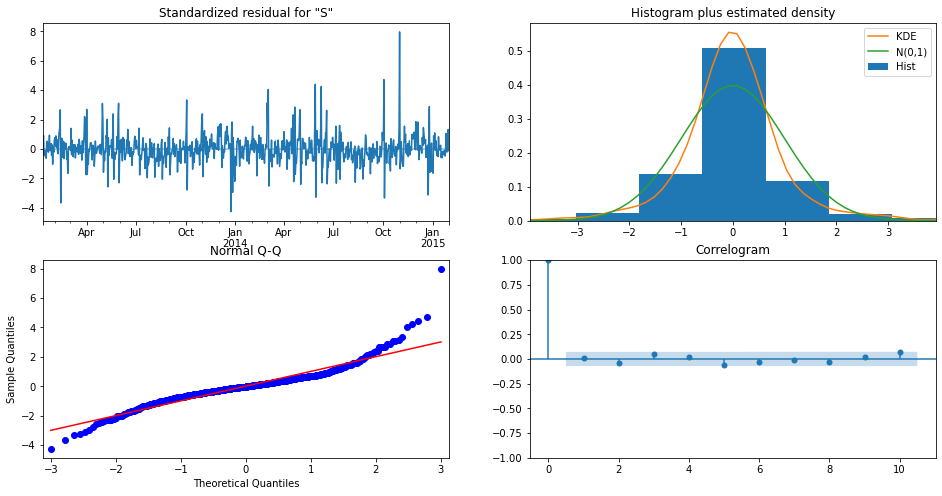

In [488]:
model_Sarima.plot_diagnostics(figsize=(16, 8))
plt.show()

In [489]:
final_pred4=model_Sarima.forecast(260)

In [490]:
fv4=final_pred[0]
fv4

array([0.53406894, 0.43529109, 0.36155757, 0.38767655, 0.46117385,
       0.4610654 , 0.28298748, 0.48431729, 0.46013997, 0.35291474,
       0.3814809 , 0.47829724, 0.43825771, 0.30606321, 0.46551994,
       0.47177898, 0.34933037, 0.37785661, 0.48711518, 0.42683714,
       0.31742944, 0.45643944, 0.47720003, 0.34790935, 0.37579615,
       0.49162745, 0.4211314 , 0.32303125, 0.4520533 , 0.47970479,
       0.34739109, 0.37465078, 0.49391671, 0.41828832, 0.32579963,
       0.44993085, 0.48084716, 0.34723689, 0.37402657, 0.49506248,
       0.41687659, 0.32717738, 0.44889788, 0.48135587, 0.34722212,
       0.37369325, 0.49562204, 0.41617927, 0.32787363, 0.44838818,
       0.48157129, 0.34725636, 0.37351979, 0.49588203, 0.41583792,
       0.32823643, 0.4481293 , 0.48165174, 0.34730502, 0.37343308,
       0.49598938, 0.41567364, 0.32843632, 0.44799038, 0.48167044,
       0.34735601, 0.37339297, 0.49601917, 0.41559729, 0.32855673,
       0.44790869, 0.48166113, 0.34740577, 0.37337768, 0.49600

In [491]:
len(fv4)

260

In [492]:
final_value44=scaler.inverse_transform([fv4])
final_value44

array([[11044.53808952,  9773.70620234,  8825.083433  ,  9161.11860718,
        10106.70220056, 10105.30691365,  7814.23561741, 10404.4554298 ,
        10093.40077045,  8713.88865174,  9081.40819392, 10327.00410824,
         9811.87330191,  8111.11770595, 10162.61703358, 10243.14306429,
         8667.77379058,  9034.77961557, 10440.45182908,  9664.9414069 ,
         8257.35052646, 10045.79138357, 10312.88798547,  8649.49151016,
         9008.27065546, 10498.50474675,  9591.53389785,  8329.42099604,
         9989.36128964, 10345.11302859,  8642.8238734 ,  8993.53486666,
        10527.95732204,  9554.95610462,  8365.03774064,  9962.05482166,
        10359.81026061,  8640.83988968,  8985.50407809, 10542.69823728,
         9536.79335817,  8382.76315802,  9948.76500678, 10366.35506785,
         8640.6499764 ,  8981.21576514, 10549.89732698,  9527.8219698 ,
         8391.72089598,  9942.20754507, 10369.12666913,  8641.09046624,
         8978.98403071, 10553.24226956,  9523.43030698,  8396.38

In [493]:
date4 = pd.date_range(start='2015/02/01', periods=260, freq='D')
date4

DatetimeIndex(['2015-02-01', '2015-02-02', '2015-02-03', '2015-02-04',
               '2015-02-05', '2015-02-06', '2015-02-07', '2015-02-08',
               '2015-02-09', '2015-02-10',
               ...
               '2015-10-09', '2015-10-10', '2015-10-11', '2015-10-12',
               '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16',
               '2015-10-17', '2015-10-18'],
              dtype='datetime64[ns]', length=260, freq='D')

In [494]:
ff44=pd.DataFrame(final_value44.reshape(-1,1), columns=['Forecast'])

In [495]:
ff44

Forecast
0    11044.538090
1     9773.706202
2     8825.083433
3     9161.118607
4    10106.702201
..            ...
255   8980.851175
256  10538.941737
257   9522.627544
258   8417.015941
259   9925.130235

[260 rows x 1 columns]

In [496]:
ff44['Time_stamp']= date4

In [497]:
ff44

Forecast Time_stamp
0    11044.538090 2015-02-01
1     9773.706202 2015-02-02
2     8825.083433 2015-02-03
3     9161.118607 2015-02-04
4    10106.702201 2015-02-05
..            ...        ...
255   8980.851175 2015-10-14
256  10538.941737 2015-10-15
257   9522.627544 2015-10-16
258   8417.015941 2015-10-17
259   9925.130235 2015-10-18

[260 rows x 2 columns]

In [498]:
ff44=ff44.set_index('Time_stamp')

In [499]:
ff44

Forecast
Time_stamp              
2015-02-01  11044.538090
2015-02-02   9773.706202
2015-02-03   8825.083433
2015-02-04   9161.118607
2015-02-05  10106.702201
...                  ...
2015-10-14   8980.851175
2015-10-15  10538.941737
2015-10-16   9522.627544
2015-10-17   8417.015941
2015-10-18   9925.130235

[260 rows x 1 columns]

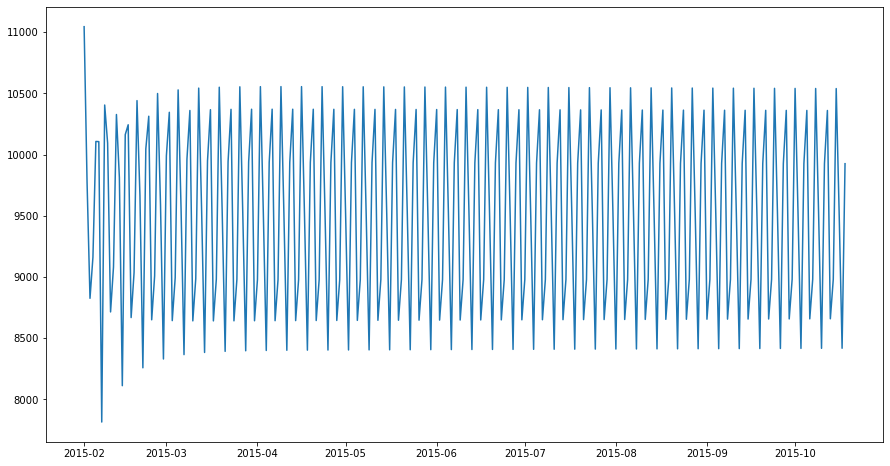

In [500]:
plt.plot(ff44)

Text(0.5, 0, 'Days')

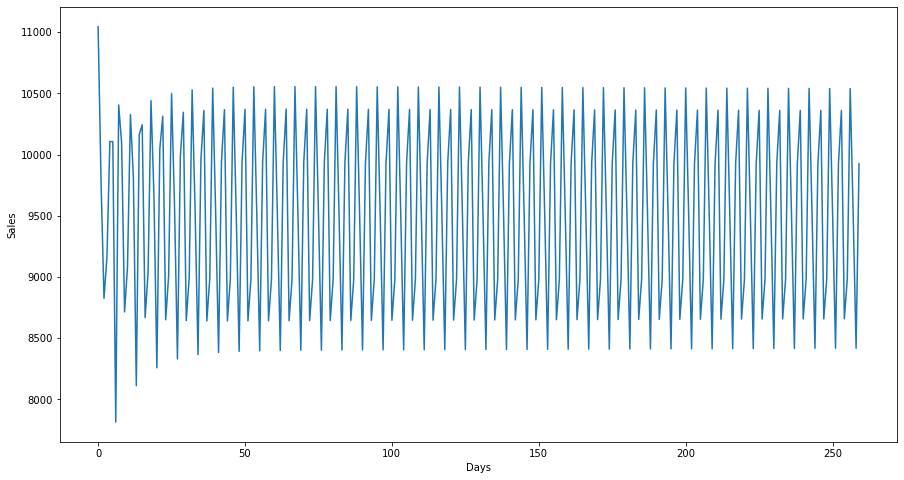

In [501]:
x=list(range(len(ff44.Forecast.index)))
y=ff44.Forecast

fig=plt.figure()
plt.plot(x,y)
plt.ylabel('Sales')
plt.xlabel('Days')

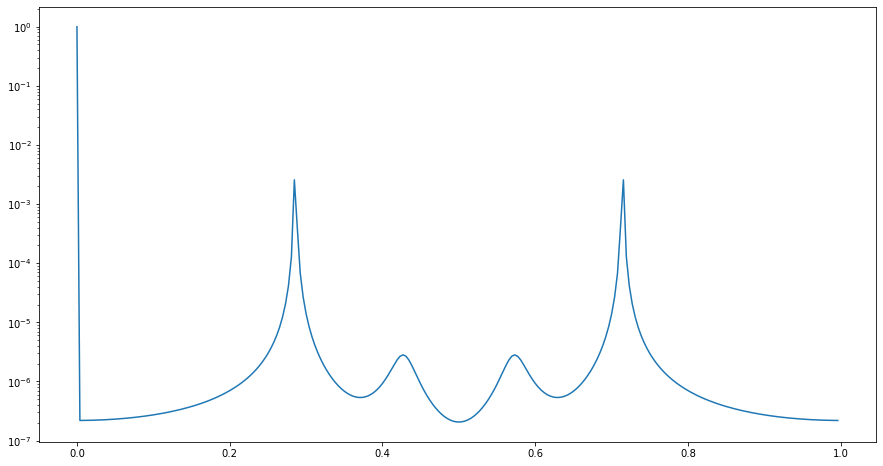

In [502]:
f=abs(np.fft.fft(y))
num=np.size(x)
freq=[i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)

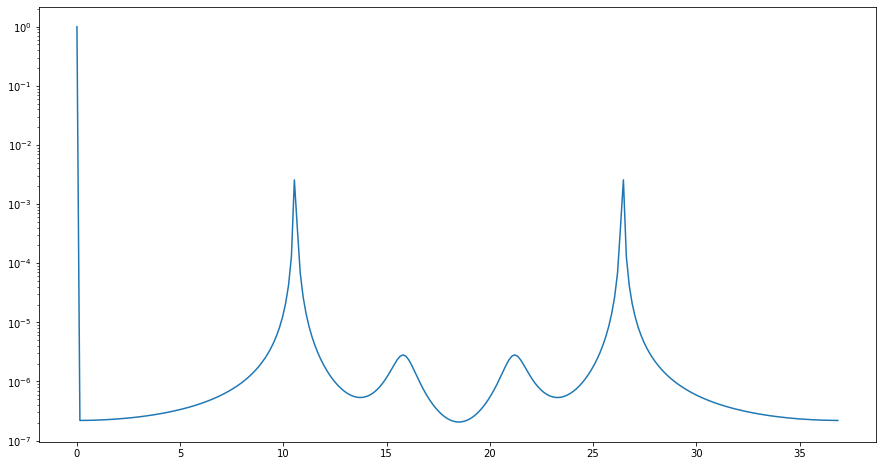

In [503]:
results=pd.DataFrame({'freq':freq, 'nspectrum':nspectrum})
results['period']=results['freq']/(1/37)
plt.semilogy(results['period'], results['nspectrum'])

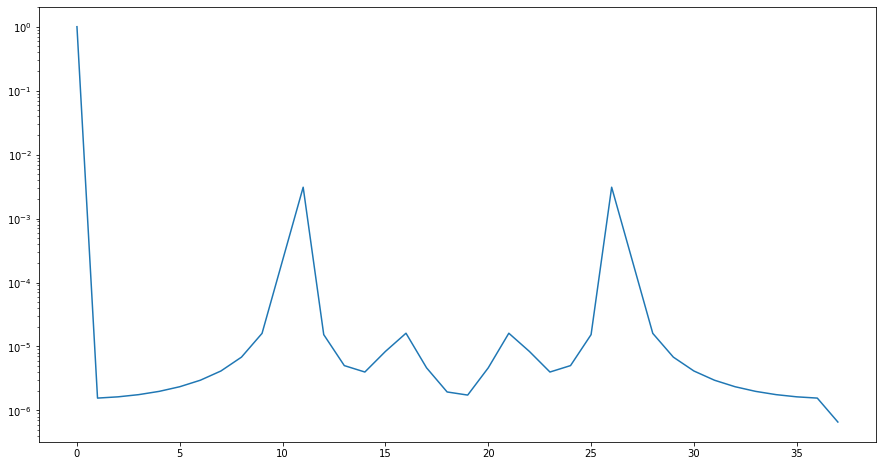

In [504]:
results['period_round']=results['period'].round()
grouped_week=results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)